# Progetto FAD 25-26

Progetto di gruppo per il corso di *Fondamenti di Analisi dei Dati* — A.A. 2025/2026

**Nome del gruppo**: *The Bayesians*

**Membri del gruppo**:
- *Filippo Falzone*  
- *Francesco Greco*

Il progetto si basa sullo studio di un dataset contenente informazioni circa varie automobili vendute.
I dati sono stati raccolti in India e le auto vendute sono usate. Quindi lo studio si baserà sul comprendere il mercato delle automobili usate in India.

---

## 1. Analisi dei dati

Questa fase iniziale è dedicata alla **comprensione approfondita del dataset**. Si procederà nel seguente ordine:
- Data Understanding
- Data Cleaning & Preparation
- Analisi Esplorativa
- Inferenza Statistica

### 1.1 Data Understanding

Ci concentreremo sull'iniziare a conoscere il dataset, comprendendo a fondo il significato di ogni variabile e formulando alcune domande su cui strutturare le successive fasi dell'analisi dei dati. 

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [456]:
df = pd.read_csv('../../data_set/train-data.csv', index_col=0)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Vediamolo nel dettaglio:

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


Il nostro dataset ha **13 caratteristiche** (colonne) e **6019 osservazioni** (righe).

Adesso creiamo un dizionario dei dati, in modo da avere una comprensione maggiore delle varie caratteristiche.

**Dizionario dei Dati**
| Variabile             | Tipo / Scala                     | Descrizione                                                                                         | Unità |
| --------------------- | -------------------------------- | --------------------------------------------------------------------------------------------------- | ------------ |
| **Name**              | Qualitativa / Nominale           | Combinazione di marchio e modello dell’auto. | –            |
| **Location**          | Qualitativa / Nominale           | Città o regione in cui l’auto è in vendita.                                                         | –            |
| **Year**              | Numerica / Discreta / Intervalli | Anno di produzione del modello.                | –            |
| **Kilometers_Driven** | Numerica / Continua / Ratio      | Chilometri totali percorsi dall’auto.                                                               | km           |
| **Fuel_type**         | Qualitativa / Nominale           | Tipo di carburante utilizzato dall’auto.                                                            | –            |
| **Transmission**      | Qualitativa / Nominale            | Tipo di trasmissione: `automatica` o `manuale`.                                                         | –            |
| **Owner_Type**        | Qualitativa / Ordinale           | Indica il numero di proprietari precedenti che il veicolo ha avuto prima del venditore attuale. Le categorie sono ordinate per numero crescente di proprietari: `first_hand` (il venditore è il primo proprietario), `second_hand`, `third_hand`, e `fourth_above` (quattro o più proprietari).                            | –            |
| **Mileage**           | Numerica / Continua / Ratio      | Consumo di carburante dell’auto.                                               | kmpl o km/kg |
| **Engine**            | Numerica / Continua / Ratio      | Cilindrata del motore.                                                                              | cc           |
| **Power**             | Numerica / Continua / Ratio      | Potenza massima del motore.                                                                         | bhp          |
| **Seats**             | Numerica / Discreta / Ratio      | Numero di posti a sedere.            | –            |
| **New_Price**         | Numerica / Continua / Ratio      | Rappresenta il prezzo di un auto nuova dello stesso modello.                                                         | INR Lakhs    |
| **Price**             | Numerica / Continua / Ratio      | Prezzo di vendita dell’auto usata.                 | INR Lakhs    |


Alcune considerazioni sulle variabili:
- da `Name` potremmo estrarre marchio dell'auto
- da `Year` possiamo calcolare l'età dell'auto
- `Transmission` è una variabile binaria (ha solo due possibili categorie)
- modifica di `Owner_Type` in modo da renderla discreta ordinale
- `Seats` può aiutare a classificare il veicolo (SUV, sportiva, etc...)
- individuiamo `Price` come variabile target da predire per nuove osservazioni

**Obiettivi dell'Analisi dei Dati**


Dopo aver descritto e compreso le varie caratteristiche del dataset abbiamo formulato alcuni **obiettivi** su cui basare la nostra analisi dei dati, che ricordiamo basarsi sullo studio del mercato di auto usate in India:
- Quali sono i fattori principali che determinano il prezzo (`Price`) di un'auto usata? 
- In che modo l'età dell'auto (derivata da `Year`) e i chilometri percorsi (`Kilometers_Driven`) interagiscono nel definire il valore?
- Quale impatto hanno le caratteristiche tecniche come il motore o la potenza (`Engine` o `Power`) e il tipo di cambio (`Transmission`) sul prezzo?
- Esistono marche (estratte da `Name`) o località (`Location`) specifiche in cui le auto mantengono meglio il loro valore?  

---

### 1.2 Data Cleaning & Preparation

È molto importate preparare il dataset prima di poter iniziare ad analizzare le variabili e come essere sono correlate. Questo perché eventuali valori mancanti o anomalie (outlier) ci porterebbo a conclusioni errate o inconsistenti.

Cominciamo dando un occhiata ai **valori mancanti** (Nan) presenti nelle nostre colonne:

In [458]:
print(df.isna().sum())

print("")

print("---- NaN percentage per variable ----")
for x in df:
    if df[x].isnull().sum() > 0:
        value = (df[x].isna().sum()/len(df[x])) * 100
        print(f"{x}: {value:.2f}%")

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

---- NaN percentage per variable ----
Mileage: 0.03%
Engine: 0.60%
Power: 0.60%
Seats: 0.70%
New_Price: 86.31%


Vediamo che la maggior parte delle colonne contengono una **quantità irrilevanti di valori mancati**. Quelli che sono presenti (i missing values) si possono sistemare facilmente: o eliminiamo quelle righe, o facendo un'imputazione, o infine applicando Feature Engineering.

Tuttavia `New_Price` è un **disastro**: 5195 su 6019 righe sono vuote. Parliamo dell'86% dei dati.

- **Imputazione**: impossibile, Il prezzo di listino dello stesso modello è troppo specifico; non possiamo stimarlo tramite le caratteristiche presenti in questo dataset. Introdurebbe bias.

- **Rimozione**: Avere così tanti buchi rende la colonna inutile sia per un analisi e sia per la fase di modeling. Non possiamo farci affidamento. E' la scelta più pragmatica in questo caso.

Verifichiamo se nel nostro dataset sono presenti **righe duplicate**, che porterebbero ad un analisi non corretta, e nel caso eliminarle:

In [459]:
duplicate_count = df.duplicated().sum()

df.drop_duplicates(inplace=True)

print(f"Rimosse di n. righe duplicate: {duplicate_count}")


Rimosse di n. righe duplicate: 0


Adesso eseguiremo **per ogni feature** un processo di Data Cleaning che includerà:
- gestione dei Valori Mancanti
- Correzzione di Inconsistenze e Formattazione 
- Gestione degli outliers

**1. `Name`**

Ricordiamo che 'Name' contiene il brand dell'auto osservazione.

Inoltre, come abbiamo verificato poco fa, non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per la variabile 'Name', che include il brand veicolo, abbiamo deciso di fare Feature Extraction per scomporre questa stringa in una nuova variabile: Brand. Questo perché, anche se la variabile 'Name' è pulita, l'analisi e la modellazione predittiva non traggono molti benefici da variabili con troppi valori unici. 

Creeremo quindi la nuova variabile Brand estraendola dalla stringa originale.

In [460]:
df['Brand'] = df['Name'].str.split(' ').str[0]
df = df.drop('Name', axis=1)

first_col = ['Brand']

remaining_cols = [col for col in df.columns if col not in first_col]

df = df[first_col + remaining_cols]

print("Brand creato e inserito come prima colonna.")

df = df.reset_index(drop=True)

df.head()

Brand creato e inserito come prima colonna.


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Controlliamo se è tutto corretto:

In [461]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

Due situazioni risaltano all'occhio, una più banale e un'altra da gestire: 
- ISUZU deve essere modificata in Isuzu e unita ad essa
- Ci sono tanti Brand con pochi elementi, questo porterebbe tali brand a non essere statisticamente rilevanti.

Per migliorare la capacità di generalizzazione del modello e prevenire l'overfitting, è stata effettuata una gestione della cardinalità della variabile 'Brand'. I marchi con meno di 60 osservazioni sono stati raggruppati in due macro-categorie, 'Other' e 'Other_Luxury', basandosi sul posizionamento di mercato del brand. Questa operazione riduce la complessità dello spazio delle feature mantenendo l'informazione sul valore intrinseco dei marchi di prestigio.

In [462]:
# 1. Pulizia iniziale: Lowercase per evitare errori di battitura (es. 'Audi' vs 'audi')
df['Brand'] = df['Brand'].str.strip().str.lower()

# 2. Controllo ed eliminazione duplicati (se presenti nel dataset intero)
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"Rimossi {duplicates_count} record duplicati.")
    df.drop_duplicates(inplace=True)

# 3. Definizione liste di riferimento (tutto in lowercase per il confronto)
luxury_list = [
    'lamborghini', 'bentley', 'porsche', 'jaguar', 'land rover', 
    'mini', 'volvo', 'mercedes-benz', 'audi', 'bmw', 'lexus'
]

# Calcoliamo le frequenze sui nomi puliti
brand_counts = df['Brand'].value_counts()
rare_brands = brand_counts[brand_counts < 60].index

# 4. Funzione di pulizia avanzata
def clean_brand_smart(brand):
    # Se il brand è raro
    if brand in rare_brands:
        if brand in luxury_list:
            return 'other_luxury'
        else:
            return 'other'
    return brand

# Applichiamo la funzione
df['Brand'] = df['Brand'].apply(clean_brand_smart)

# 5. Formattazione finale: Prima lettera in Uppercase (Title Case)
# Usiamo .str.title() ma facciamo attenzione a 'Other_Luxury'
df['Brand'] = df['Brand'].str.capitalize()
df.loc[df['Brand'] == 'Other_luxury', 'Brand'] = 'Other_Luxury'

# 6. Reset dell'indice e verifica
df.reset_index(drop=True, inplace=True)

print("Distribuzione Brand dopo il raggruppamento:")
print(df['Brand'].value_counts())

Rimossi 1 record duplicati.
Distribuzione Brand dopo il raggruppamento:
Brand
Maruti           1210
Hyundai          1107
Honda             608
Toyota            411
Mercedes-benz     318
Volkswagen        315
Ford              300
Mahindra          272
Bmw               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Other_Luxury      107
Nissan             91
Other              91
Land               60
Name: count, dtype: int64


**2. `Location`**

Ricordiamo che 'Location' contiene il luogo in cui l'auto è stata venduta.

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Non sono necessari controlli su questa variabile, potremmo controllare se i nomi dei luoghi assunti da essa **esistono veramente**. Lo faremo ma solo per ottenere **informazioni circa i luoghi** in cui queste auto sono state rivendute:

In [463]:
print(df['Location'].unique())
print("")
print(df['Location'].value_counts())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Location
Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64


Abbiamo esaminato i luoghi riportati sopra, non solo essi non sono frutto di errore o fantasia, ma sono tutte **grandi città metropolitane** indiane.

Non è necessario alcun controllo degli outlier per questa variabile.

**3. `Year`**

Questa variabile indica l'anno in cui l'auto è stata prodotta.

Come visto prima non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per questa variabile non servono particolari controlli di questo tipo. Ma possiamo applicare pure qui un po di Feature Engeneering per trarre l'età dell'auto. Questo perché vogliamo cambiare la scala da intervalli a ratio, e inoltre in questo modo abbiamo a disposizione numeri più piccoli.
Sembra che il dataset utilizzi come anno di riferimento il 2019, quindi l'età è la differenza Anno_di_produzione - Year.

Creeremo quindi la variabile `Age`:

In [464]:
current_year = 2019

index_year = df.columns.get_loc('Year')
age_values = current_year - df['Year']
df.insert(index_year, 'Age', age_values)
df.drop('Year', axis=1, inplace=True)

print('Age creata.')

Age creata.


*Gestione degli Outlier*

Inizieremo mostrando un boxplot per questa variabile:

<Axes: >

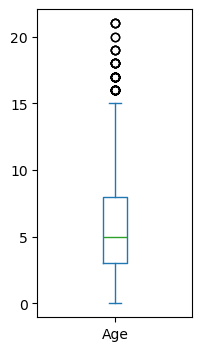

In [465]:
df['Age'].plot.box(figsize=(2,4))

Age (Year) non presenta molti outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente, che potrebbero portare solamente a confusione, inoltre, oltre una certa soglia non è manco più statisticamente rilevante l'età. Abbiamo scelto di rimuovere le auto più vecchie di 14 anni (2005).

In [466]:
threshold = 14
auto_vecchie = df[df['Age'] > threshold]

df = df[df['Age'] <= threshold]
df.reset_index(drop=True, inplace=True)

print(f"Numero di auto rimosse: {len(auto_vecchie)}")

Numero di auto rimosse: 81


**4. `Kilometers_Driven`**

Questa variabile contiene quanti chilometri ha percorso l'auto.

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Questa variabile è gia pulita, non ci sono particolari controlli da fare.

*Gestione degli outliers*

Inizieremo plottando un boxplot:

<Axes: >

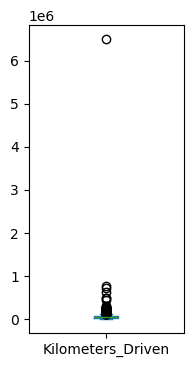

In [467]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Si nota subito quel numero spaventoso lì in alto, sicuramente impossibile. Sicuramente un errore. Meglio rimuoverlo.

Ci aspetteremmo comunque che auto che superino il milione di chilometri percorsi siano outliers. Perché potrebbero essere sia errori dovuti all'inserimento e sia auto molto molto vecchie.

In [468]:
print("Outlier estremi:")
print(df[df['Kilometers_Driven'] >= 1000000])

df = df[df['Kilometers_Driven'] < 1000000]
df.reset_index(drop=True, inplace=True)

Outlier estremi:
     Brand Location  Age  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2300   Bmw  Chennai    2            6500000    Diesel    Automatic      First   

         Mileage   Engine    Power  Seats New_Price  Price  
2300  15.97 kmpl  2993 CC  258 bhp    5.0       NaN   65.0  


Plottiamo di nuovo il boxplot:

<Axes: >

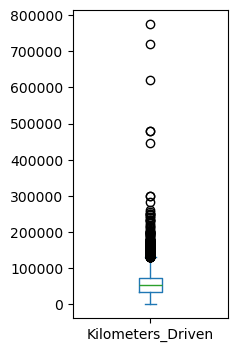

In [469]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Vogliamo sistemare questi outlier imputando il 99° percentile. Perché i valori sono troppo distanti, potrebbe portare solo che rumore al modello. Inoltre nel mercato odierno già sopra un tot chilometri sarebbero da rottamare le auto. Quindi potremmo usare il 99° percentile proprio per dire al modello di considerare l'auto massimamente usata, dato che dopo una certa soglia non c'è quasi nulla più da togliere. 

Soglia (99%): 170000 km


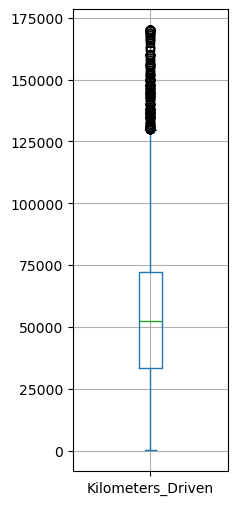

In [470]:
soglia_99 = df['Kilometers_Driven'].quantile(0.99)
print(f"Soglia (99%): {soglia_99:.0f} km")

df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > soglia_99, 
                                   soglia_99, 
                                   df['Kilometers_Driven'])

df.reset_index(drop=True, inplace=True)

df['Kilometers_Driven'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

**5. `Fuel_Type`**

'Fuel_Type' contiene il tipo di carburante utilizzato dall'auto.

Come abbiamo verificato prima 'Fuel_Type' non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [471]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3187
Petrol      2681
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

Notiamo subito il duopolio Diesel e Petrol, poi ci sono alcune nicchie. 

La presenza di auto che fanno uso di 'CNG' e 'LPG' e di auto elettriche è un po' problematica. La poca presenza nel dataset potrebbe indicare che c'è **poco mercato** nella regione di studio per auto di questa tipologia.

Inoltre, come vedremo più avanti, la caratteristica `Mileage` (chilometri percorsi per quantità utilizzata di carburante) utilizza due differenti unità di misura: una per 'Diesel' e 'Petrol ed una per 'LPG' e 'CNG', addirittura ha valori nulli per 'Electric'. Rendendo più complessa la loro gestione.

Data la scarsità di informazioni e la bassa rappresentatività di queste nicchie, uno studio approfondito che le includa risulterebbe eccessivamente complesso e poco significativo.

Pertanto, per ottimizzare l'analisi, la decisione è di escludere le tipologie di carburante 'Electric', 'CNG' e 'LPG' dal dataset.

In [472]:
df = df[(df['Fuel_Type'] != 'Electric') & (df['Fuel_Type'] != 'CNG') & (df['Fuel_Type'] != 'LPG')]

df = df.reset_index(drop=True)

print("Nicchie rimosse.")

Nicchie rimosse.


**6. `Transmission`**

Contiene un'etichetta, ovvero il tipo di cambio dell'auto.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [473]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Assume solamente due etichette, se l'auto e manuale o automatica. In futuro possiamo farla diventare una variabile discreta binaria per una possibile modellazione.

**7. `Owner_Type`**

Contiene un'etichetta, ovvero quanti proprietari aveva l'auto al momento della vendita.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [474]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [475]:
df['Owner_Type'].value_counts()

Owner_Type
First             4845
Second             922
Third               93
Fourth & Above       8
Name: count, dtype: int64

Essendo molto poche le auto di quarta mano, potremmo combinarle insieme alla terza. 

In [476]:
df['Owner_Type'] = df['Owner_Type'].replace('Fourth & Above', 'Third')

Non sembrano esserci ulteriori problemi, in futuro potremmo farla diventare una variabile numerica discreta per la parte di modeling.

**8. `Mileage`**

Contiene l'efficienza del motore dell'auto.

Verifichiamo il numero di valori mancanti:

In [477]:
print("Valori mancanti:", df['Mileage'].isna().sum())

Valori mancanti: 0


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [478]:
df_mileage = df['Mileage'].dropna()

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_mileage.astype(str).str.match(pattern)

total_obs = len(df_mileage)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
mileage_units = df_mileage.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
mileage_units.unique()

Conformi: 5868
Non conformi: 0

---- Unità di misura presenti ----


array(['kmpl'], dtype=object)

Per nostra fortuna tutte le righe **seguono la formattazione prevista**. L'altra unità di misura probabilmente corrispondeva con i carburanti CNG o LPG.

Procediamo con l'estrarre i valori numerici:

In [479]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

df['Mileage'] = df['Mileage'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli Outliers*

Plottiamo il boxplot:

<Axes: >

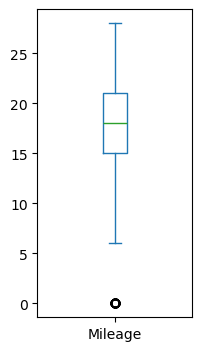

In [480]:
df['Mileage'].plot.box(figsize=(2,4))

Notiamo che abbiamo dei valori molto vicini a zero, auto che hanno un alta efficienza esistono, ma valori così bassi sono impossibili.

In [481]:
print(f"Valori per mileage inaccettabili: {len(df[df['Mileage'] <= 0])}")

Valori per mileage inaccettabili: 56


Queste righe sono i valori inaccettabili, sono outliers. Per così poche osservazione non ne vale la pena imputare valori, introdurebbe solo bias, per questo abbiamo deciso di rimuovere queste osservazioni.

In [482]:
df = df[df['Mileage'] > 0]
df = df.reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


**9. `Engine`**

Assume come valore la cilindrata in CC (centimetri-cubi) del motore dell'auto.

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*

In [483]:
print("Valori mancanti:", df['Engine'].isna().sum())

Valori mancanti: 23


Meno del 1% delle osservazioni ha un valore mancante per Engine.

Potremmo imputare il valore inserendo al media dei valori (più robusta agli outlier), ma essendo che il dataset contiene sia auto di lusso e sia auto economiche rischieremmo di inserire un valore non valido per il tipo di auto e quindi di creare degli outlier. 

Per questo motivo abbiamo deciso di eliminare le osservazioni che presentano dei valori mancanti.

In [484]:
df = df[~df['Engine'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [485]:
df_engine = df['Engine']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_engine.astype(str).str.match(pattern)

total_obs = len(df_engine)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
engine_units = df_engine.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
engine_units.unique()

Conformi: 5789
Non conformi: 0

---- Unità di misura presenti ----


array(['CC'], dtype=object)

In [486]:
df['Engine'] = df['Engine'].str.split(' ').str[0]
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df['Engine'] = df['Engine'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

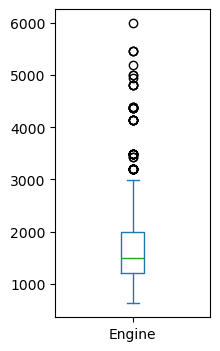

In [487]:
df['Engine'].plot.box(figsize=(2,4))

In Engine non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così.

**10. `Power`**

Contiene la potenza dell'auto espressa in bhp.

*Gestione dei valori mancanti*


In [488]:
print(f"Valori mancanti: {df['Power'].isna().sum()}")

Valori mancanti: 0


Notiamo che non ha valori mancanti, mentre prima abbiamo visto che li aveva, molto probabilmente perché queste osservazioni coincidono con quelle eliminate in precedenza

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [489]:
df_power = df['Power']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_power.astype(str).str.match(pattern)

total_obs = len(df_power)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
power_units = df_power.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
power_units.unique()

Conformi: 5789
Non conformi: 0

---- Unità di misura presenti ----


array(['bhp'], dtype=object)

In [490]:
pattern_numerico = r'.*\d+.*'

# 1. Identifica le stringhe che NON contengono un numero
# Il .astype(str) è importante per catturare tutti i tipi di stringa
non_numeriche_mask = ~df['Power'].astype(str).str.contains(pattern_numerico, na=False)

# 2. Converti le stringhe non numeriche identificate in NaN
df.loc[non_numeriche_mask, 'Power'] = np.nan

print(f"Smascherati {non_numeriche_mask.sum()} valori senza numeri come NaN.")

Smascherati 74 valori senza numeri come NaN.


In [491]:
df = df[~df['Power'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [492]:
df['Power'] = df['Power'].str.split(' ').str[0]
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df['Power'] = df['Power'].astype('float64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

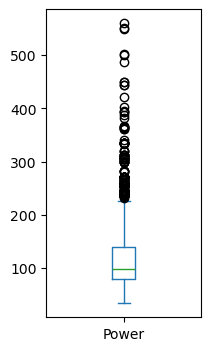

In [493]:
df['Power'].plot.box(figsize=(2,4))

In Power non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così. Stesso discorso che valeva anche per Engine.

**11. `Seats`**

Contiene il numero di passeggeri che può ospitare l'auto.

*Gestione valori mancanti*

In [494]:
print(f"Valori mancanti: {df['Seats'].isna().sum()}")

Valori mancanti: 1


Mancano alcuni valori, vediamo quali valori assume questa variaibile. Ci aspetteremmo una predominanza di auto a 5 posti, che sono le più diffuse.

In [495]:
df['Seats'].value_counts()

Seats
5.0     4783
7.0      666
8.0      131
4.0       88
6.0       28
2.0       13
9.0        3
10.0       2
Name: count, dtype: int64

Visto che il valore che esce più spesso è 5, e dato che vogliamo tenere più dati possibili, abbiamo deciso di fare una cosa semplice: sostituire i valori mancanti nella colonna dei posti con un bel '5'.

Così facciamo un piccolo "errore" statistico, perché stiamo gonfiando un po' la categoria da 5 posti. Però è un ottimo compromesso tra l'essere precisi e l'avere un dataset completo. L'unica cosa che potremmo fare è rimuovere le classi 9 e 10, in quanto sono davvero poche.

Dato che i dati mancanti sono davvero pochi, questo piccolo trucchetto non rovinerà l'analisi generale né influenzerà seriamente il modello finale.

Procediamo all'imputazione e la rimozione:

In [496]:
df = df[df['Seats'] <= 8]
df = df.reset_index(drop=True)

In [497]:
mediana_seats = df['Seats'].median()
df['Seats'] = df['Seats'].fillna(mediana_seats)

print("Valori imputati.")

Valori imputati.


In [498]:
df['Seats'] = df['Seats'].astype(int)

*Gestione degli outlier*

Mostriamo il boxplot:

<Axes: >

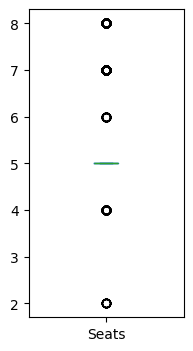

In [499]:
df['Seats'].plot.box(figsize=(2,4))

Abbiamo visto prima che più del 90% del dataset ha 5 posti. Probabilmente anche per questo motivo viene considerato outlier qualsiasi numero non sia 5. Lasciamo tutto così, dato che è tutto perfettamente plausibile.

**12. `New Price`**

Questa variabile contiene il valore del prezzo del nuovo modello di quell'auto, espresso in Lakh

*Gestione dei valori mancanti*

In [500]:
print(f"Valori mancanti: {df['New_Price'].isna().sum()}")

Valori mancanti: 4901


Questa colonna ha quasi tutti i valori mancanti. La sua gestione è molto problematica perché un imputazione risulta difficile perché non abbiamo abbastanza informazioni.

Quindi abbiamo deciso di rumuoverla per una questioni logistiche.

In [501]:
df.drop('New_Price', axis=1, inplace=True)

print("Colonna rimossa.")

Colonna rimossa.


**13. `Price`**

Questa variabile contiene il prezzo con cui è stata venduta l'auto.

Come visto prima questa variabile non ha alcun valore mancante.

Non c'è alcun controllo di formattazione o inconsistenza da fare per questa variabile. Essa è già pulita.

*Gestione degli outliers*

Vediamo il boxplot:

<Axes: >

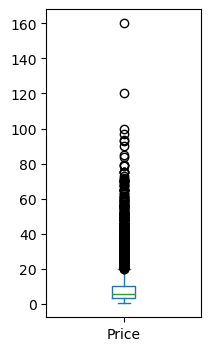

In [502]:
df['Price'].plot.box(figsize=(2,4))

Innanzitutto notiamo una distribuzione altamente asimmetrica, per la precisione right-skewed (se plottassimo la distribuzione). Converrebbe fare una trasformazione logaritmica per portare la sua ditribuzione ad assomigliare a quella normale (Gaussiana), per migliorare le performance del notro modello.

Vediamo che presenta molti valori alti, potrebbero riferirsi ad auto molto costose come auto di lusso, ma vediamo meglio:

In [503]:
df[df['Price'] > 100]

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3864,Land,Hyderabad,2,25000.0,Diesel,Automatic,First,13,2993,255.0,5,160.0
5490,Other_Luxury,Delhi,8,6500.0,Petrol,Automatic,Third,6,5204,560.0,2,120.0


Infatti stimo parlando di auto di lusso, che sono molto costose. Non si trattano di outliers, non sono errori di prezzo. Tuttavia essendo che la nostra analisi include anche questo tipo di auto, abbiamo deciso di non rimuovere queste osservazioni.

Facciamo un controllo mirato per valori impossibili:

In [504]:
df[df['Price'] < 0.5]

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1622,Tata,Pune,8,65000.0,Petrol,Manual,Second,26,624,35.0,4,0.44
2691,Hyundai,Pune,14,86000.0,Petrol,Manual,Second,15,1341,83.0,5,0.45


Non abbiamo alcun valore zero (sarebbero senza dubbio outlier), ma queste auto non sono outlier.

> Abbiamo finito il nostro processo di Data Cleaning & Preparation, ne risulta un dataset più pulito e pronto per un analisi più approfondita.

In questo momento il dataset si presenta in questo modo:

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5709 entries, 0 to 5708
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5709 non-null   object 
 1   Location           5709 non-null   object 
 2   Age                5709 non-null   int64  
 3   Kilometers_Driven  5709 non-null   float64
 4   Fuel_Type          5709 non-null   object 
 5   Transmission       5709 non-null   object 
 6   Owner_Type         5709 non-null   object 
 7   Mileage            5709 non-null   int64  
 8   Engine             5709 non-null   int64  
 9   Power              5709 non-null   float64
 10  Seats              5709 non-null   int64  
 11  Price              5709 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 535.3+ KB


---

## 1.3 Analisi Esplorativa

Questa parte si concentra su uno studio più approfondito delle caratteristiche delle nostre osservazioni e sulle loro possibili correlazioni.

Si divide in due parti:
- **Analisi Univariata**, in cui calcoleremo le varie statistiche sommarie per una variabile alla volta
- **Analisi Multivariata**, in cui andremo ad esplorare le varie correlazioni provando a spiegare eventuali scoperte

### 1.3.1 Analisi Univariata

Come detto prima ci concentreremo su una variabile alla volta, seguendo un po' lo schema utilizzato per la parte precedente.

**1. `Brand`**

Andiamoli a visualizzare:

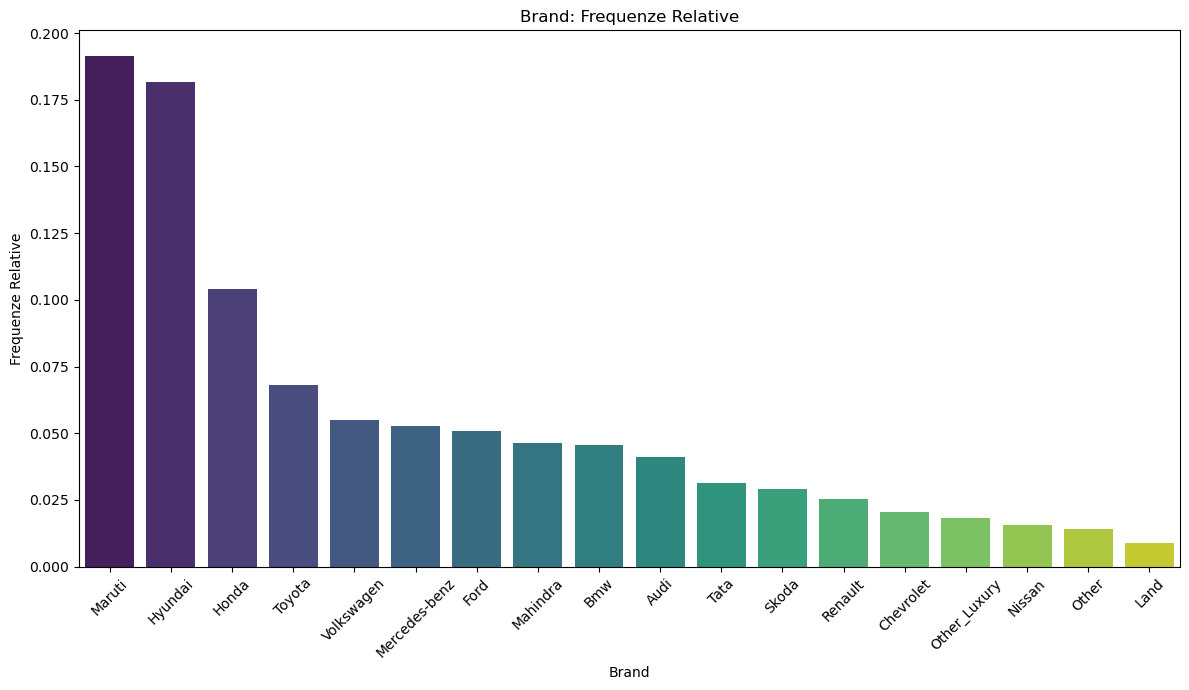

In [506]:
plt.figure(figsize=(12, 7))

brands = df['Brand'].value_counts(normalize=True)
ax = sns.barplot(x=brands.index, y=brands.values, hue=brands.index, palette='viridis', legend=False)

plt.title('Brand: Frequenze Relative')
plt.xticks(rotation=45)
plt.ylabel('Frequenze Relative')

plt.tight_layout()
plt.show()

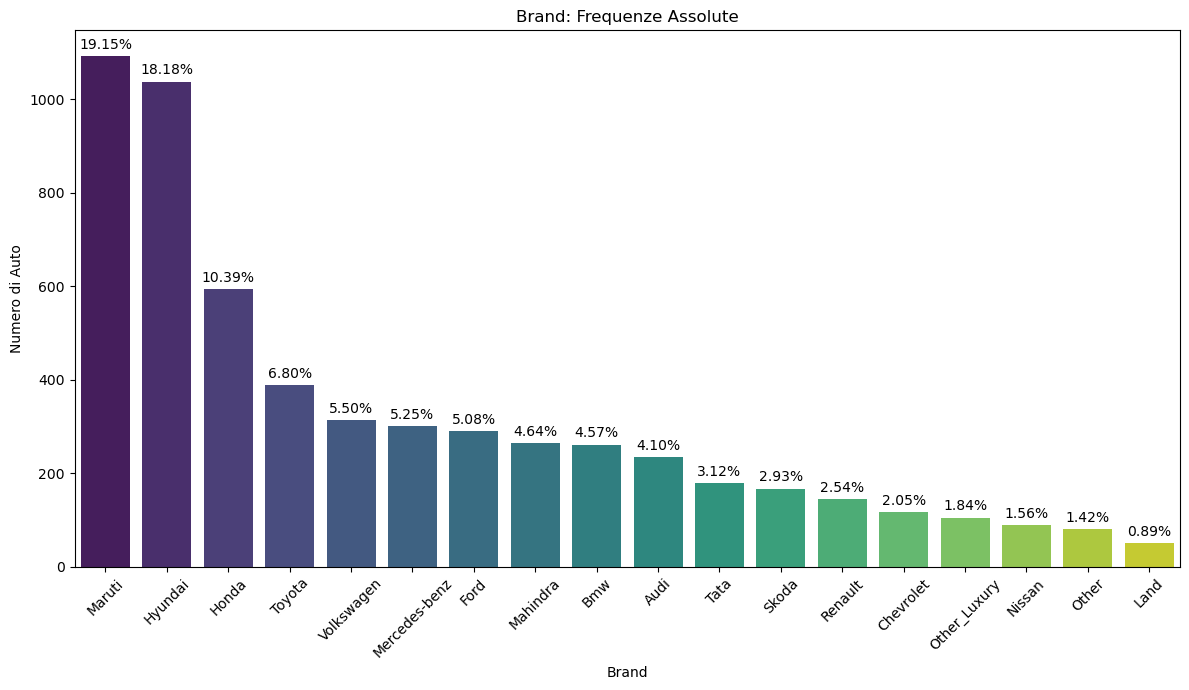

In [507]:
count_assoluto = df['Brand'].value_counts()
count_relativo = (df['Brand'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Brand: Frequenze Assolute')
plt.xticks(rotation=45)
plt.ylabel('Numero di Auto')
plt.xlabel('Brand')

plt.tight_layout()
plt.show()

La distribuzione dei brand è fortemente sbilanciata verso Maruti e Hyundai (37% del totale). Questo sbilanciamento potrebbe creare problemi, inoltre notiamo che la nostra idea iniziale di combinare le auto in Other e Other Luxury, ha dato una mano.

**2. `Location`**

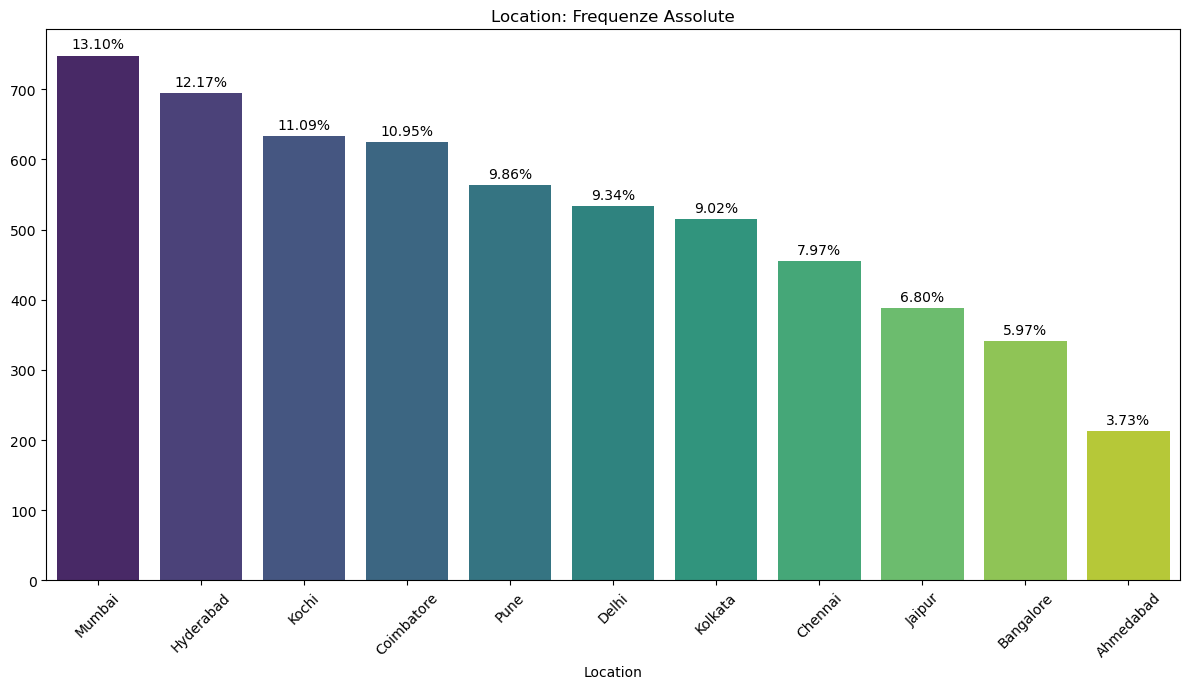

In [508]:
count_assoluto = df['Location'].value_counts()
count_relativo = (df['Location'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Location: Frequenze Assolute')
plt.xticks(rotation=45)
plt.xlabel('Location')

plt.tight_layout()
plt.show()

Questa variabile va bene così, è abbastanza bilanciata, e a differenza di prima tra le classi c'è una discesa più graduale. Anche qui bisognerà renderle dummy.

**3. `Age`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [509]:
col = df['Age']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        5.398844
std         2.963774
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Age, dtype: float64

mode:  0    5
Name: Age, dtype: int64

Skewness: 0.55
Kurtosis: -0.14


Notiamo varie cose:
- il **50% dei valori** ha tra i 3-7 anni
- **media**: 5.4, **mediana**: 5. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha il picco un po' più schiacciato rispetto alla normale (gaussiana)

Vediamo la sua distribuzione:

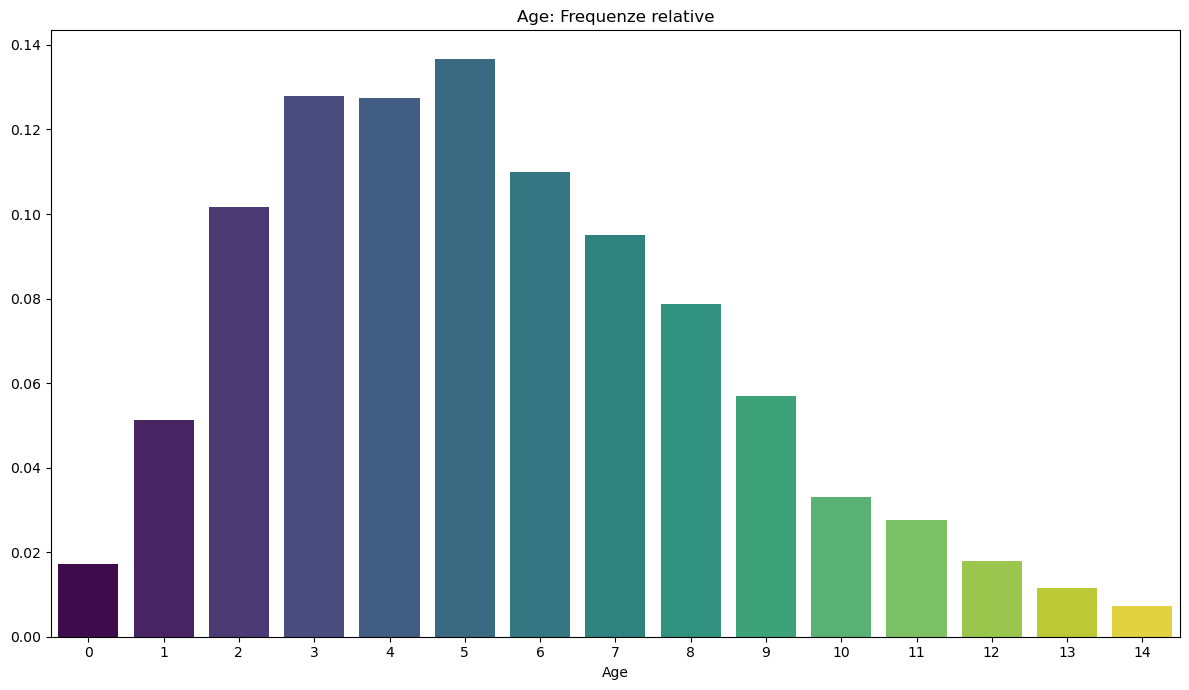

In [510]:
count = df['Age'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

sns.barplot(x=count.index, y=count.values, hue=count.index, palette='viridis', legend=False)

plt.title('Age: Frequenze relative')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Tende ad una distribuzione normale, ci piace.

**4. `Kilometers_Driven`**

In [511]:
col = df['Kilometers_Driven']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count      5709.000000
mean      56055.869329
std       32017.748047
min         171.000000
25%       33000.000000
50%       52000.000000
75%       72000.000000
max      170000.000000
Name: Kilometers_Driven, dtype: float64

mode:  0    60000.0
Name: Kilometers_Driven, dtype: float64

Skewness: 1.04
Kurtosis: 1.55


Notiamo varie cose:
- il **50% dei valori** si trova tra 33-72 mila km
- **media**: 56 mila km, **mediana**: 54 mila km. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra, ma non si discosta di così tanto
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha un picco' più alto rispetto alla normale (gaussiana)

Andiamo a vedere la sua distribuzione:

Num. of bins: 35


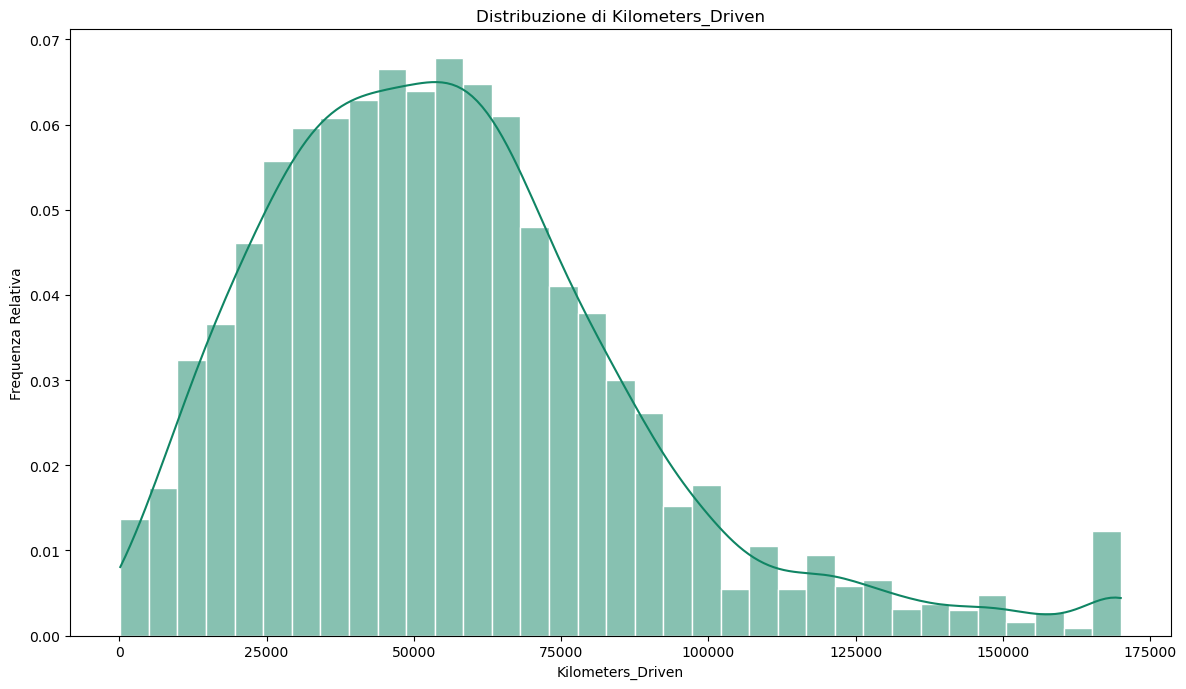

In [512]:
col = df['Kilometers_Driven']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Kilometers_Driven')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Kilometers_Driven')

plt.tight_layout()
plt.show()

Potremmo dover applicare una trasformazione logaritmica, in quanto è un po' asimmetrica.

**5. `Fuel_Type`**

Ricordiamo che Fuel_Type conteneva 5 tipi di etichette
- Diesel
- Petrol
- CNG
- LPG
- Electric

Le utlime tre componevano <1% del dataset, perciò avevamo deciso di ruomere quelle osservazioni.

Andremo quindi a mostrare uno stacked bar plot per mostrare le frequenze di questa variabile:

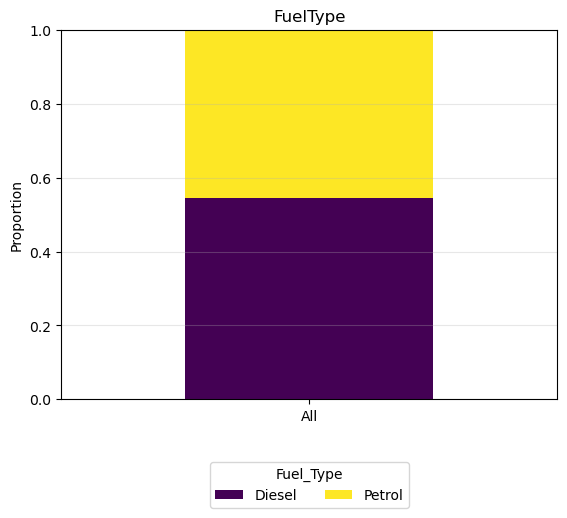

In [513]:
fuel_props = df.groupby(lambda _: 'All')['Fuel_Type'].value_counts(normalize=True).unstack()

fuel_props.plot(kind='bar', stacked=True, colormap='viridis')


plt.title('FuelType')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Fuel_Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

Notiamo che le proporzioni sono equilibrate, con una piccola predomiananza di auto a Diesel. Da trasformare in variabile binaria

**6. `Transmission`**

Vediamo la sua distribuzione:

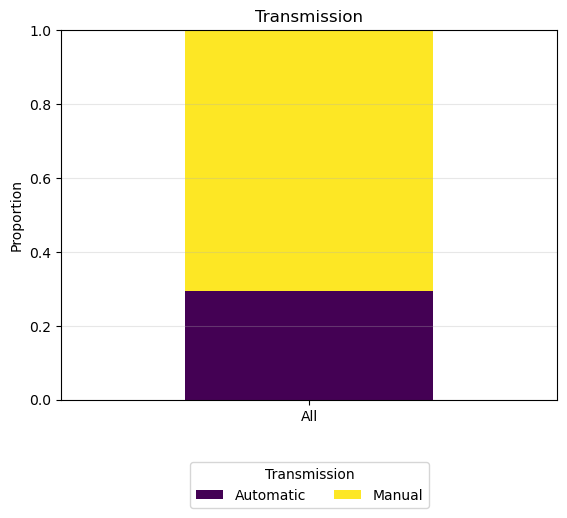

In [514]:
trans_props = df.groupby(lambda _: 'All')['Transmission'].value_counts(normalize=True).unstack()


trans_props.plot(kind='bar', stacked=True, colormap='viridis')

# Customize plot
plt.title('Transmission')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Transmission', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

C'è una predominanza di auto Manuali. Qui dovremo trasformarla in una semplice variabile binaria. 

**7. `Owner_Type`**

Distribuzione Owner Type:
  Proprietari  Frequenza  Percentuale (%)
0       First       4738        82.991767
1      Second        878        15.379226
2       Third         93         1.629007
------------------------------


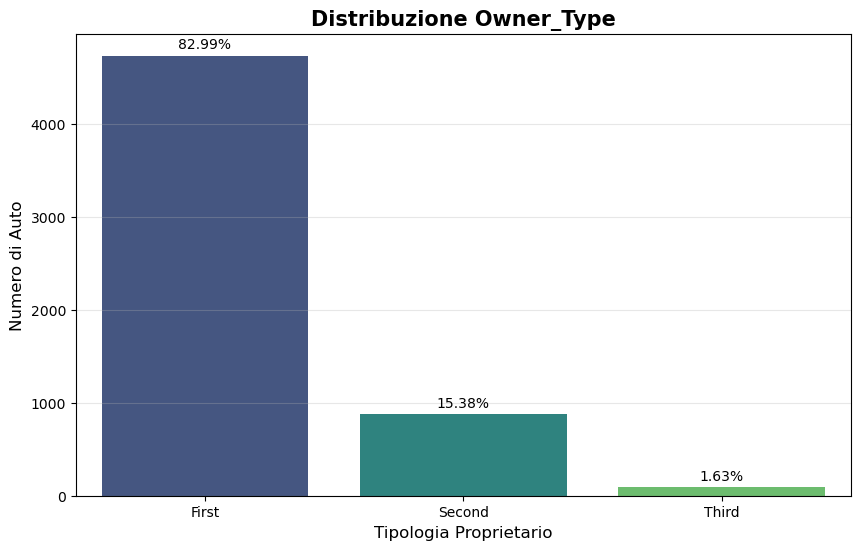

In [515]:
owner_counts = df['Owner_Type'].value_counts().reset_index()
owner_counts.columns = ['Proprietari', 'Frequenza']
owner_counts['Percentuale (%)'] = (owner_counts['Frequenza'] / len(df)) * 100

print("Distribuzione Owner Type:")
print(owner_counts)
print("-" * 30)

plt.figure(figsize=(10, 6))

order = owner_counts['Proprietari'] 

ax = sns.barplot(
    x='Proprietari', 
    y='Frequenza', 
    hue='Proprietari',
    data=owner_counts, 
    order=order,
    palette='viridis',
    legend=False
)

for i, container in enumerate(ax.containers):
    percentuale = owner_counts['Percentuale (%)'].iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)


plt.title('Distribuzione Owner_Type', fontsize=15, fontweight='bold')
plt.xlabel('Tipologia Proprietario', fontsize=12)
plt.ylabel('Numero di Auto', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

Qui abbiamo un problema di sbilanciamento tra le classi. Un idea che potremmo applicare, è trasformare queste classi, in una scala ordinale. In modo tale che il modello, nonostante abbia pochi dati di una classe, comunque sa che 3 > 1. Questo ci aiuta matematicamente per risolvere questo problema.

**8. `Mileage`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [516]:
col = df['Mileage']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean       17.901209
std         4.129523
min         6.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        28.000000
Name: Mileage, dtype: float64

mode:  0    18
Name: Mileage, dtype: int64

Skewness: 0.13
Kurtosis: -0.46


- La deviazione standard di 3.79 indica che il campione è eterogeneo. La performance di un'auto tipica si discosta dalla media per circa 3.8 km/kg.

- Dal valore della skewness notiamo che tende ad una normale. Inoltre il valore di kurtosis ci indica che abbiamo un picco più appuntito e code più pesanti rispetto alla normale.


Num. of bins: 35


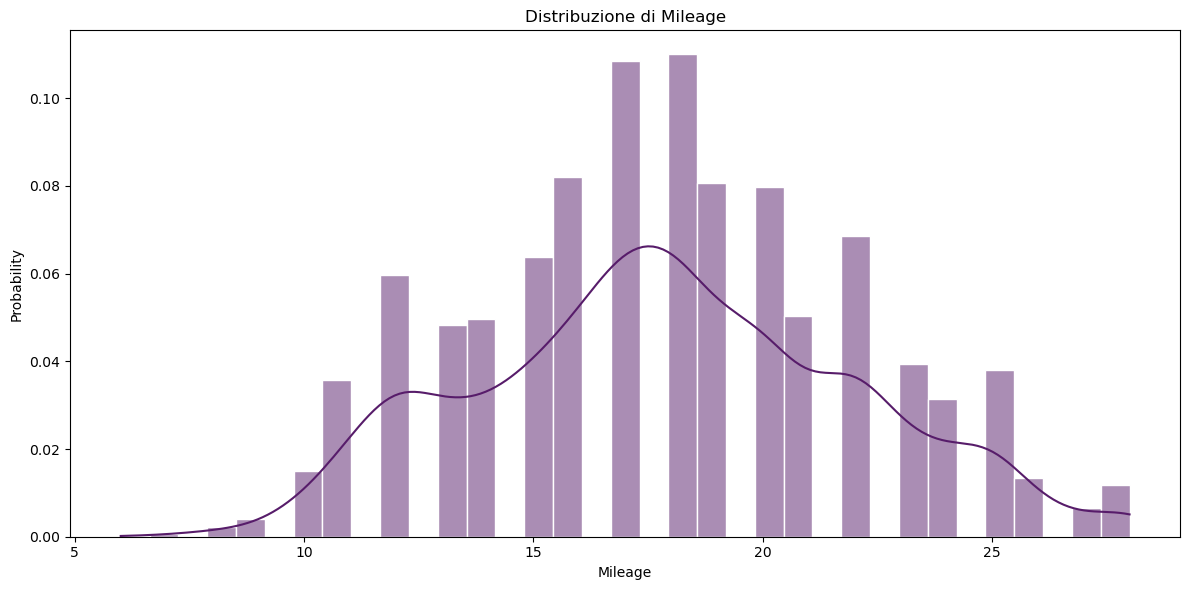

In [517]:
col = df['Mileage']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Mileage')
plt.xlabel('Mileage')

plt.tight_layout()
plt.show()

Va bene così questa variabile. Bisognerà fare scaling come in altre variabilli.

**9. `Engine`**

In [518]:
col = df['Engine']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean     1629.999299
std       598.594986
min       624.000000
25%      1198.000000
50%      1497.000000
75%      1991.000000
max      5998.000000
Name: Engine, dtype: float64

mode:  0    1197
Name: Engine, dtype: int64

Skewness: 1.43
Kurtosis: 3.24


Innanzitutto il 50% dei motori ha tra 1200 e 1984 CC di cilindrata. C'è molta varianza nei dati, essendo che la media è più grande della mediana ma non di molto significa che abbiamo alcuni valori maggiori. Ma abbiamo anche valori molto grandi, probabilmente auto sportive che hanno motori più potenti.

La Skewness ci indica che c'è una significativa asimmetria verso destra, potrebbe indicare che la maggior parte delle vendite riguardano auto economiche, utilitarie quindi con bassi CC; mentre Kurtosis ci mostra che la distribuzione è più appuntita rispetto la normale.

Num. of bins: 35


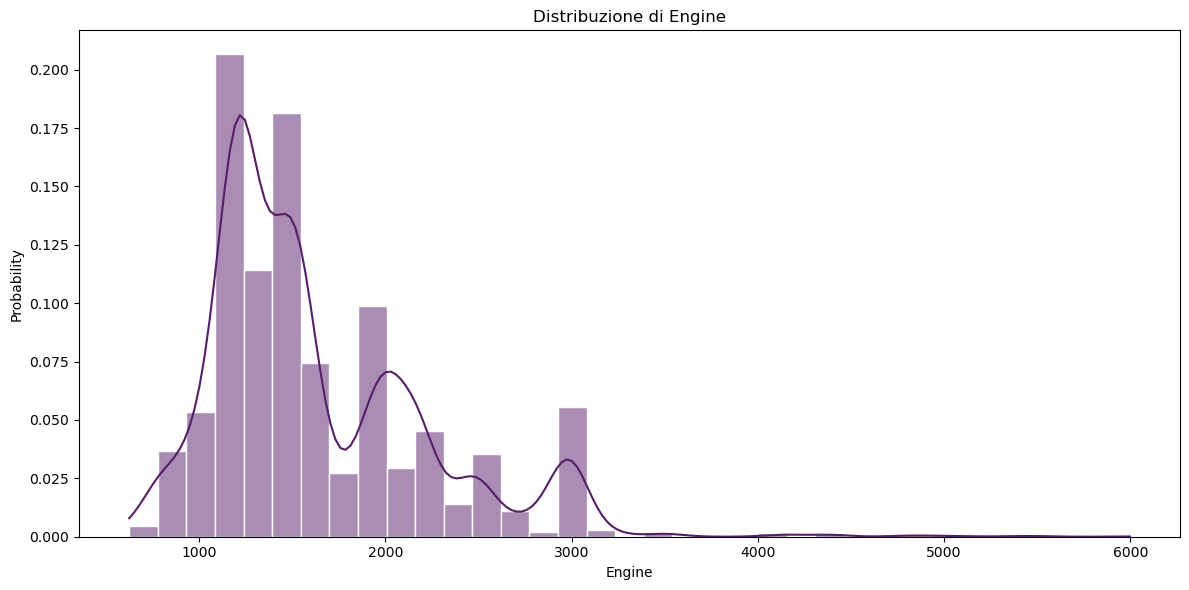

In [519]:
col = df['Engine']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Engine')
plt.xlabel('Engine')

plt.tight_layout()
plt.show()

Essendo asimmetrica, dovremmo effettuare delle trasformazioni pure qui. 

**10. `Power`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [520]:
col = df['Power']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean      114.044235
std        53.854747
min        34.200000
25%        78.900000
50%        98.600000
75%       140.000000
max       560.000000
Name: Power, dtype: float64

mode:  0    74.0
Name: Power, dtype: float64

Skewness: 1.93
Kurtosis: 6.62


Notiamo che il 50% delle osservazioni ha tra i 78 e i 138 cavalli, ma il massimo di discosta di molto, sempre per gli stessi motivi elencati per Engine.

Ci aspettiamo che Power abbia una distribuzione simile a Engine.

Num. of bins: 35


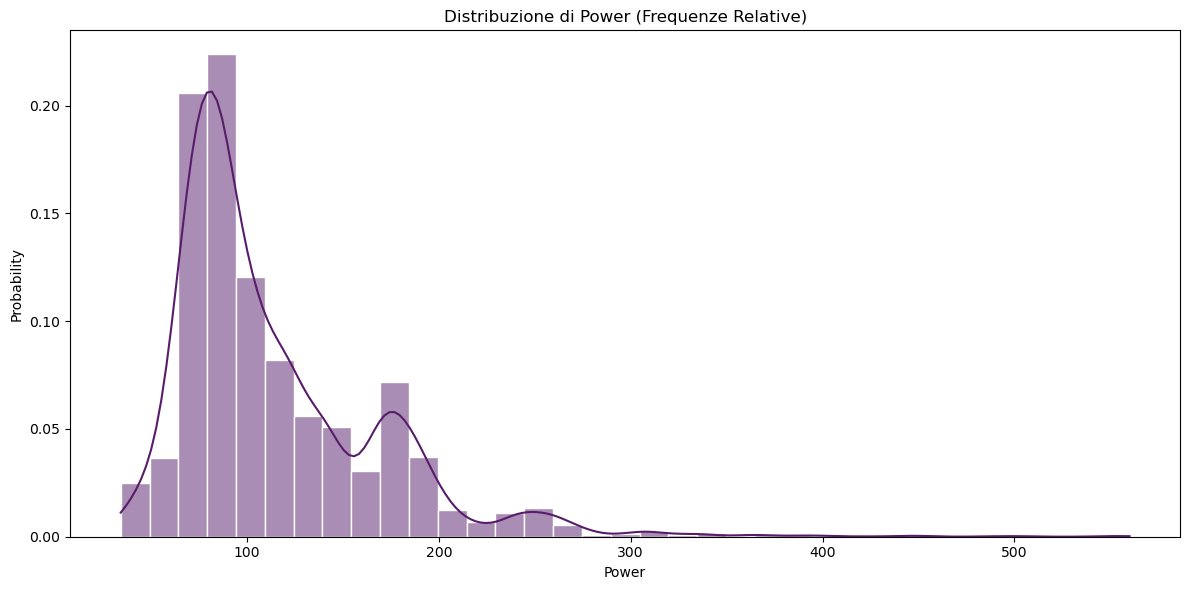

In [521]:
col = df['Power']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Power (Frequenze Relative)')
plt.xlabel('Power')

plt.tight_layout()
plt.show()

Stesso discorso fatto per Engine. 

**11. `Seats`**

In [522]:
col = df['Seats']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        5.284813
std         0.795583
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: Seats, dtype: float64

mode:  0    5
Name: Seats, dtype: int64

Skewness: 1.82
Kurtosis: 3.42


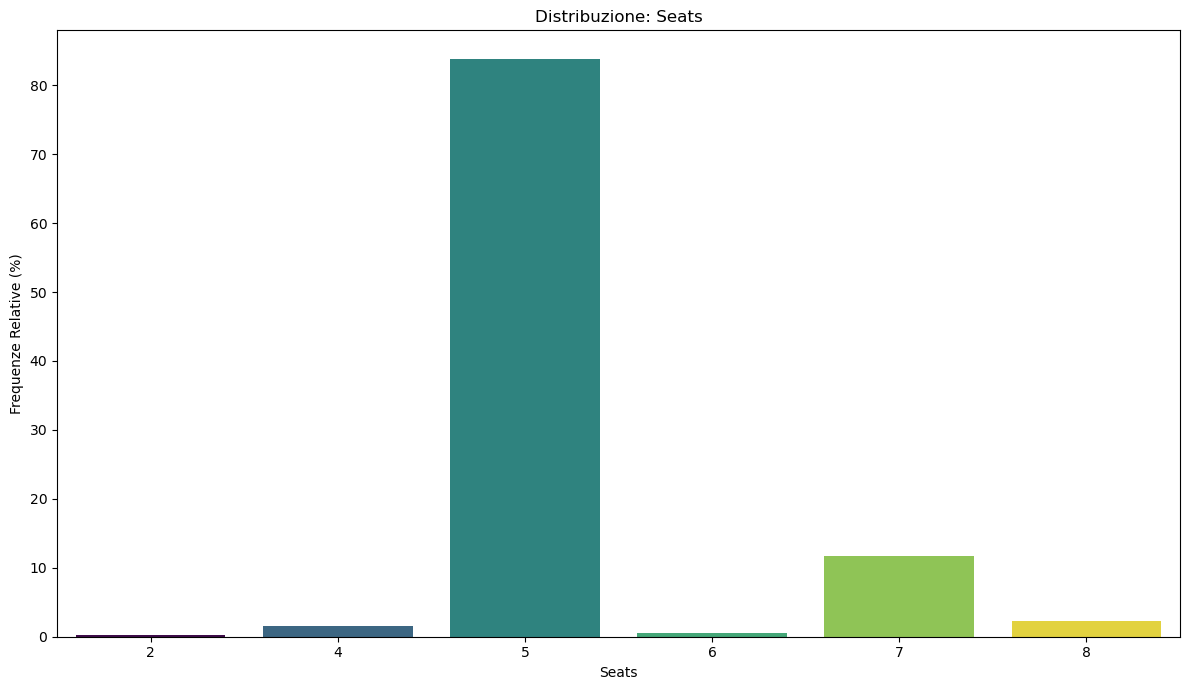

In [523]:
seats = df['Seats']

seats_abs = seats.value_counts().sort_index()
seats_rel = (seats.value_counts(normalize=True).sort_index()) * 100

plt.figure(figsize=(12, 7))


ax2 = sns.barplot(
    x=seats_rel.index, 
    y=seats_rel.values, 
    hue=seats_rel.index, 
    palette='viridis', 
    legend=False
)

plt.title('Distribuzione: Seats')
plt.xticks(rotation=0)
plt.ylabel('Frequenze Relative (%)')
plt.xlabel('Seats')

plt.tight_layout()
plt.show()


Qui abbiamo nuovamente classi sbilanciate, ma non è un problema se le lasciamo in numeri discreti, seguendo la stessa logica di Owner_Type e basandoci quindi su scala ordinale.

**12. `Price`**

Ricordiamo che il prezzo è espresso in Lahks, in cui 1 unità di Lahks equivale a 100.000. È comunemente usata per indicare cifre in Rupie indiane (INR) o pakistane (PKR). Ad esempio, "5 Lahks di Rupie" significa 500.000 Rupie.

In [524]:
col = df['Price']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        9.698599
std        11.240835
min         0.440000
25%         3.650000
50%         5.800000
75%        10.250000
max       160.000000
Name: Price, dtype: float64

mode:  0    4.5
Name: Price, dtype: float64

Skewness: 3.34
Kurtosis: 17.25


Num. of bins: 35


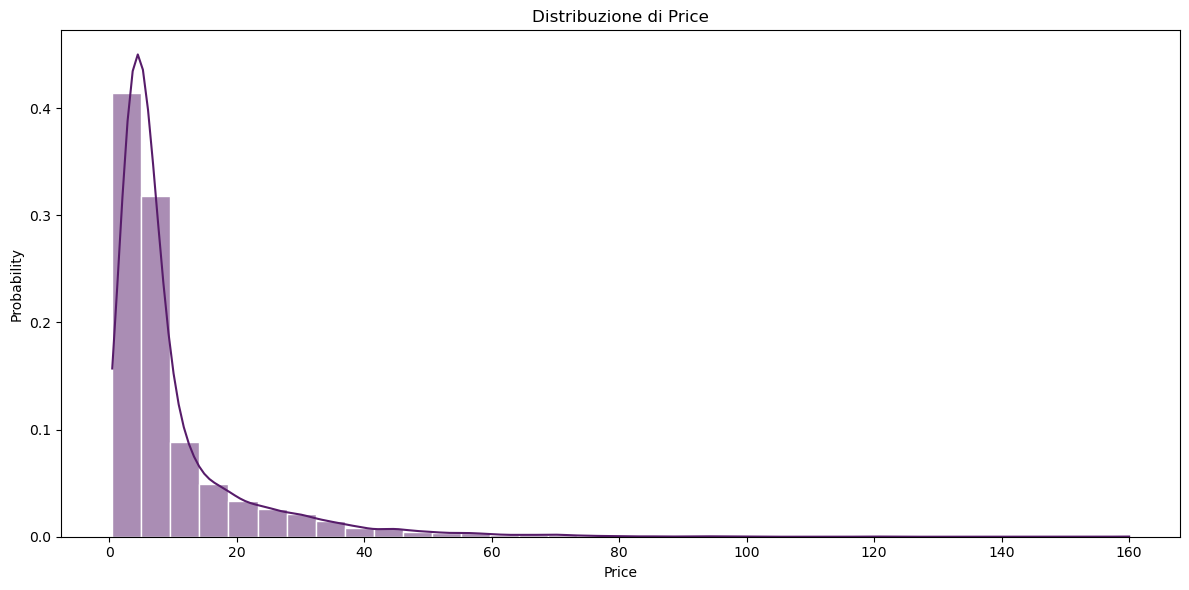

In [525]:
col = df['Price']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Price')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

Questa distribuzione è molto diversa dalla normale. Notiamo un alto picco e un'asimmetria molto accentuata. Deduciamo che le auto di lusso sono molto meno vendute delle utilitarie. La moda si aggira tra 0 e 5 Lahks, con oltre il 40% delle auto. 

Questa coda è causata da un gruppo di auto con prezzi molto, molto alti (auto di lusso, sportive, o veicoli specializzati).

Bisognerà fare necessariamente una trasformazione logaritmica.

### 1.3.2 Analisi Multivariata

Andiamo a vedere la matrice di correlazione tra le varie variabili:

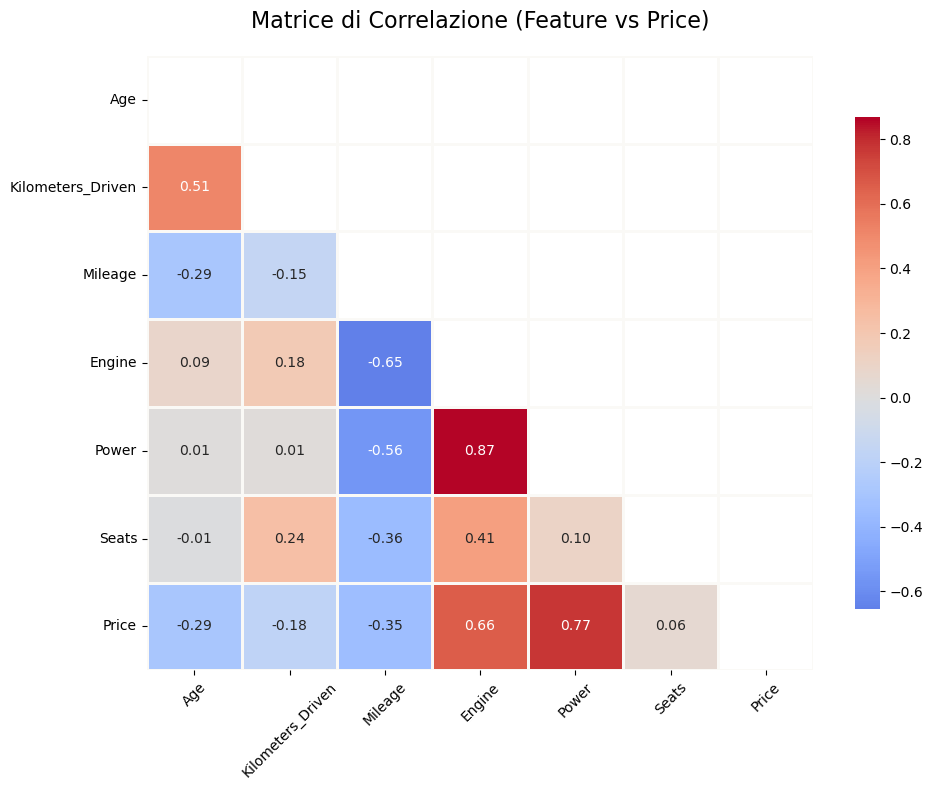

In [526]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,        
            fmt=".2f",         
            cmap='coolwarm',   
            center=0,          
            linewidths=1,      
            linecolor='#FAF9F6', 
            cbar_kws={"shrink": .8})

plt.title('Matrice di Correlazione (Feature vs Price)', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

(Power 0.77, Engine 0.66): Sono correlazioni fortissime. Significa che la potenza è il miglior predittore del prezzo. Se l'auto ha tanti cavalli, costa tanto.

L'Invecchiamento (Age -0.29): Correlazione negativa solida. Ogni anno che passa, il prezzo scende. Perfetto.

(Mileage -0.35): È negativo. Significa che più l'auto è efficiente (fa tanti km con un litro), meno costa. Perché? Perché le auto che consumano poco sono le utilitarie economiche (Maruti). Le auto che consumano molto sono le Ferrari e i SUV di lusso. Quindi ha senso.
  
**Multicollinearità**: (Engine vs Power = 0.87) Il quadratino rosso scuro tra Engine e Power. 0.87 è altissimo. Significa che queste due variabili dicono quasi la stessa cosa (motore grosso = tanta potenza).

Soluzione futura: Se il modello vacilla, potremmo doverne eliminare una delle due.

Andiamo adesso a visualizzare degli scatter plots, per vedere le distribuzioni delle varie coppie di variabili.

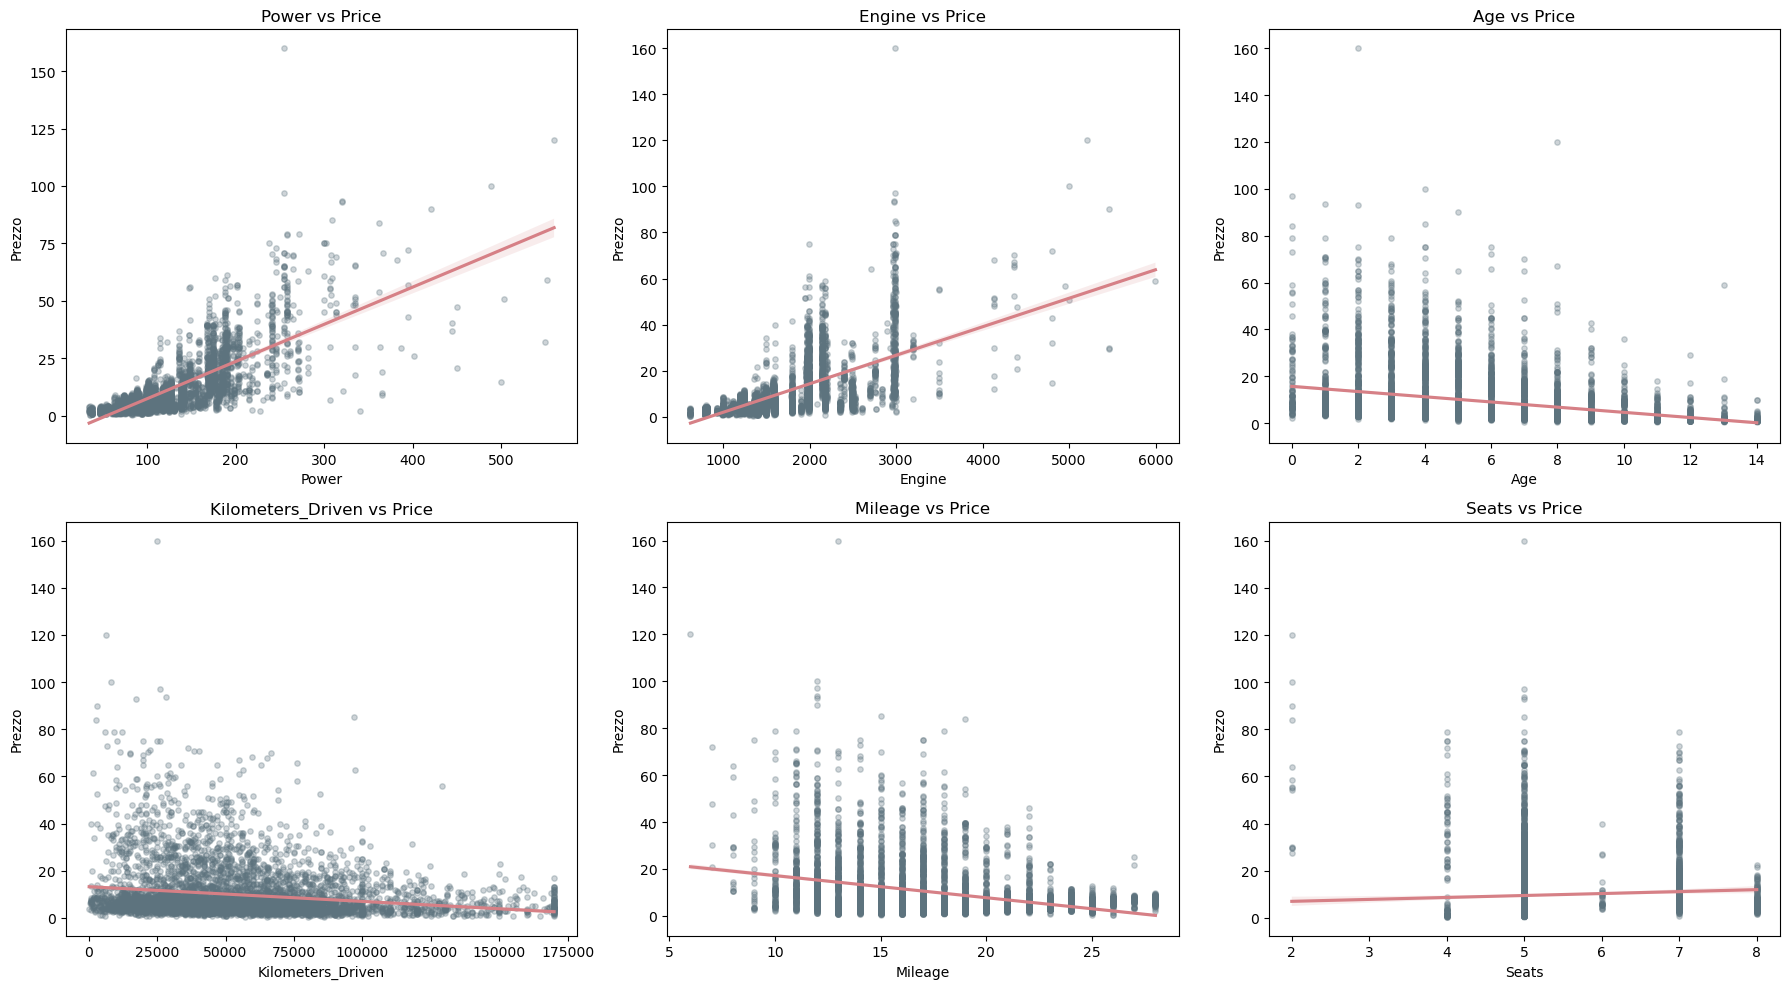

In [527]:
vars_to_plot = ['Power', 'Engine', 'Age', 'Kilometers_Driven', 'Mileage', 'Seats'] 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i],
                scatter_kws={'color': '#5D737E', 'alpha': 0.3, 's': 15}, 
                line_kws={'color': '#D68086'}) 
    
    axes[i].set_title(f'{col} vs Price', fontsize=12)
    axes[i].set_ylabel('Prezzo')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

L'analisi visiva delle variabili grezze evidenzia relazioni significative col target, ma anche evidenti non-linearità (crescita esponenziale di Price con Power). Inoltre, variabili come i Kilometers presentano una distribuzione fortemente asimmetrica. Queste osservazioni giustificano la necessità di applicare trasformazioni logaritmiche (in particolare sul Target Price e su Kilometers_Driven) per linearizzare le relazioni e stabilizzare la varianza prima di procedere con la modellazione.

Andiamo a vedere come cambia Price in relazione alle varie variabili:

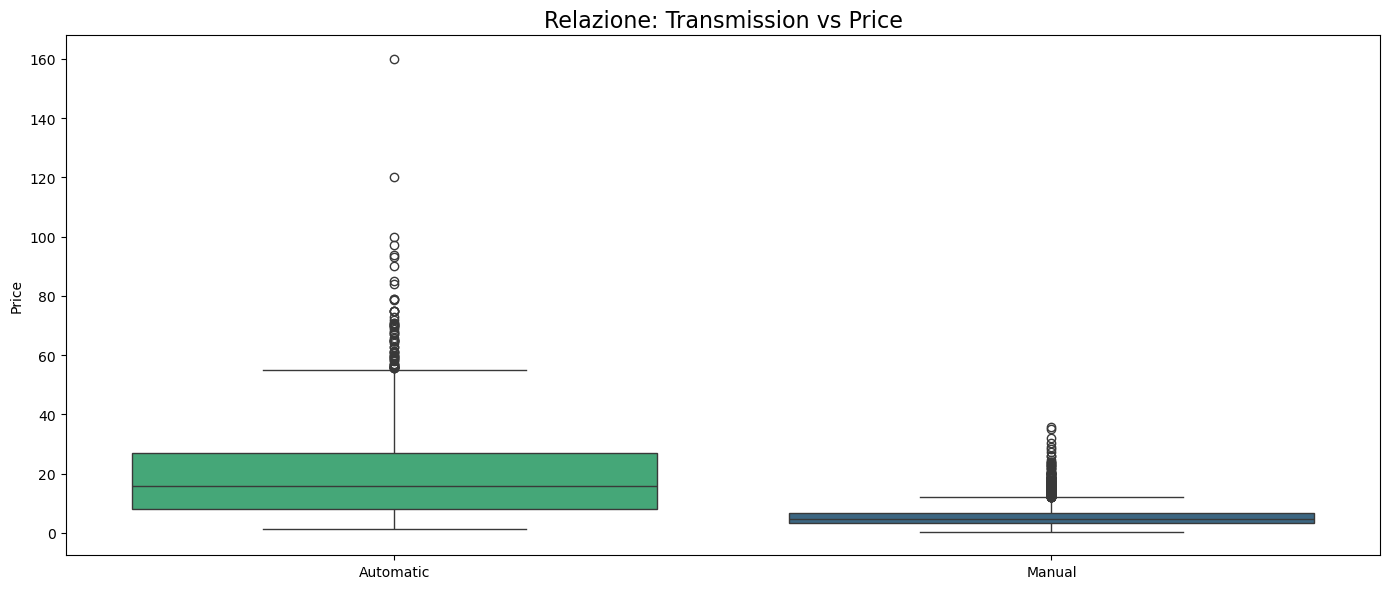

Statistiche per TRANSMISSION:
              count   mean  median    std
Transmission                             
Automatic      1672  19.86   16.00  15.99
Manual         4037   5.49    4.75   3.52


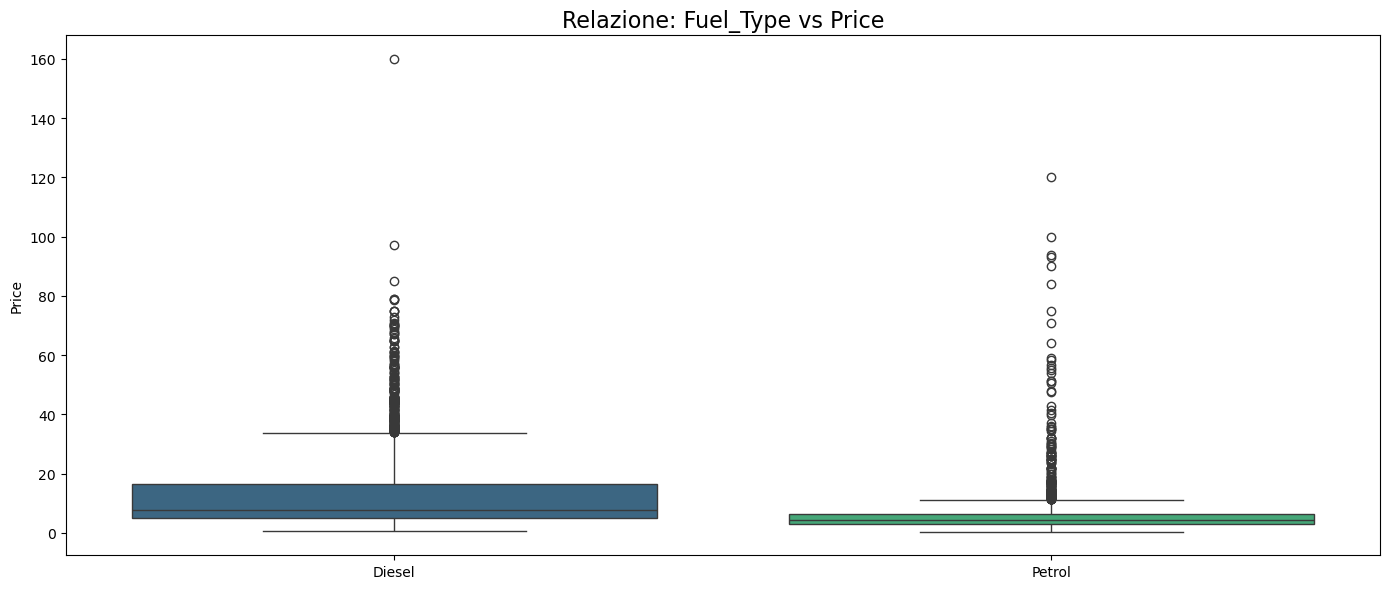

Statistiche per FUEL_TYPE:
           count   mean  median    std
Fuel_Type                             
Diesel      3116  12.89    7.83  12.79
Petrol      2593   5.86    4.25   7.40


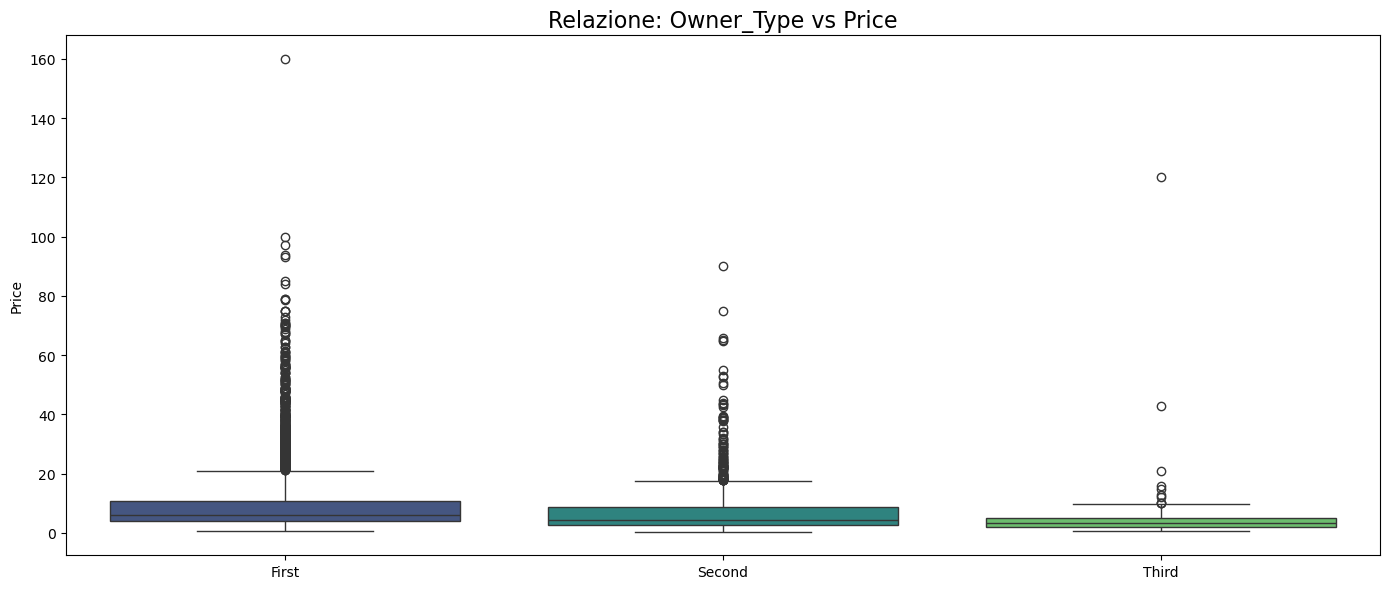

Statistiche per OWNER_TYPE:
            count   mean  median    std
Owner_Type                             
First        4738  10.10    6.00  11.43
Second        878   7.97    4.51   9.67
Third          93   5.80    3.25  13.11


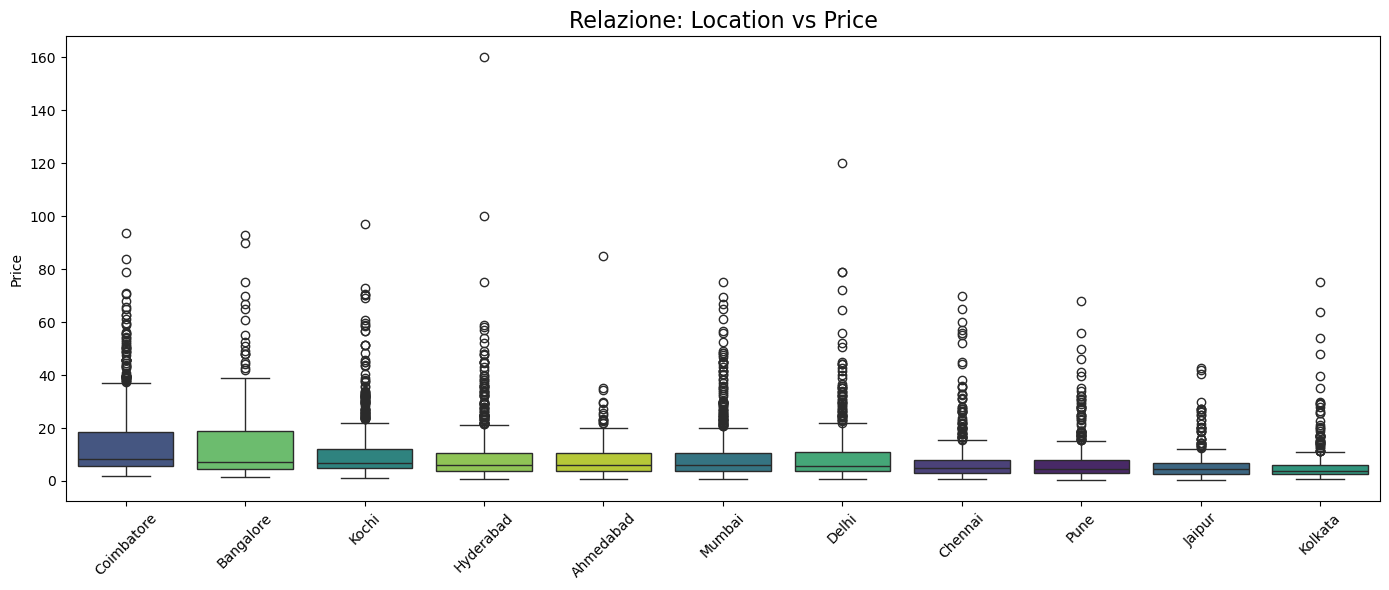

Statistiche per LOCATION:
            count   mean  median    std
Location                               
Coimbatore    625  15.02    8.34  14.82
Bangalore     341  13.55    7.20  14.36
Kochi         633  11.32    6.82  11.90
Hyderabad     695  10.10    6.00  12.19
Ahmedabad     213   8.47    6.00   8.28
Mumbai        748   9.60    5.93  10.23
Delhi         533   9.91    5.70  11.69
Chennai       455   8.02    4.80   9.58
Pune          563   7.03    4.50   7.61
Jaipur        388   6.07    4.35   5.94
Kolkata       515   5.73    3.75   6.97


In [528]:
cat_cols = ['Transmission', 'Fuel_Type', 'Owner_Type', 'Location']

for col in cat_cols:
    stat = df.groupby(col)['Price'].agg(['count', 'mean', 'median', 'std'])
    
    stat = stat.sort_values(by='median', ascending=False)
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=col, y='Price', data=df, order=stat.index, palette='viridis', hue=col)
    plt.title(f'Relazione: {col} vs Price', fontsize=16)
    plt.ylabel('Price')
    plt.xlabel('')
    
    if len(stat) > 5:
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()
    
    print(f"Statistiche per {col.upper()}:")
    print(stat.round(2))

Notiamo varie cose:
- auto 'Automatic' in media hanno un prezzo maggiore (2,77 Lakh) delle auto 'Manual' (1.74 Lakh)
- auto che fanno uso di 'Diesel' come carburante hanno un prezzo maggiore in media di quelle che fanno uso di 'Petrol' (2.32 vs 1.70 Lahk)
- auto che hanno avuto meno proprietari hanno un prezzo maggiore in media
- la `Location` non sembra influenzare significativamente il prezzo

Mettiamo a confronto `Transmission` con `Fuel_Type`:

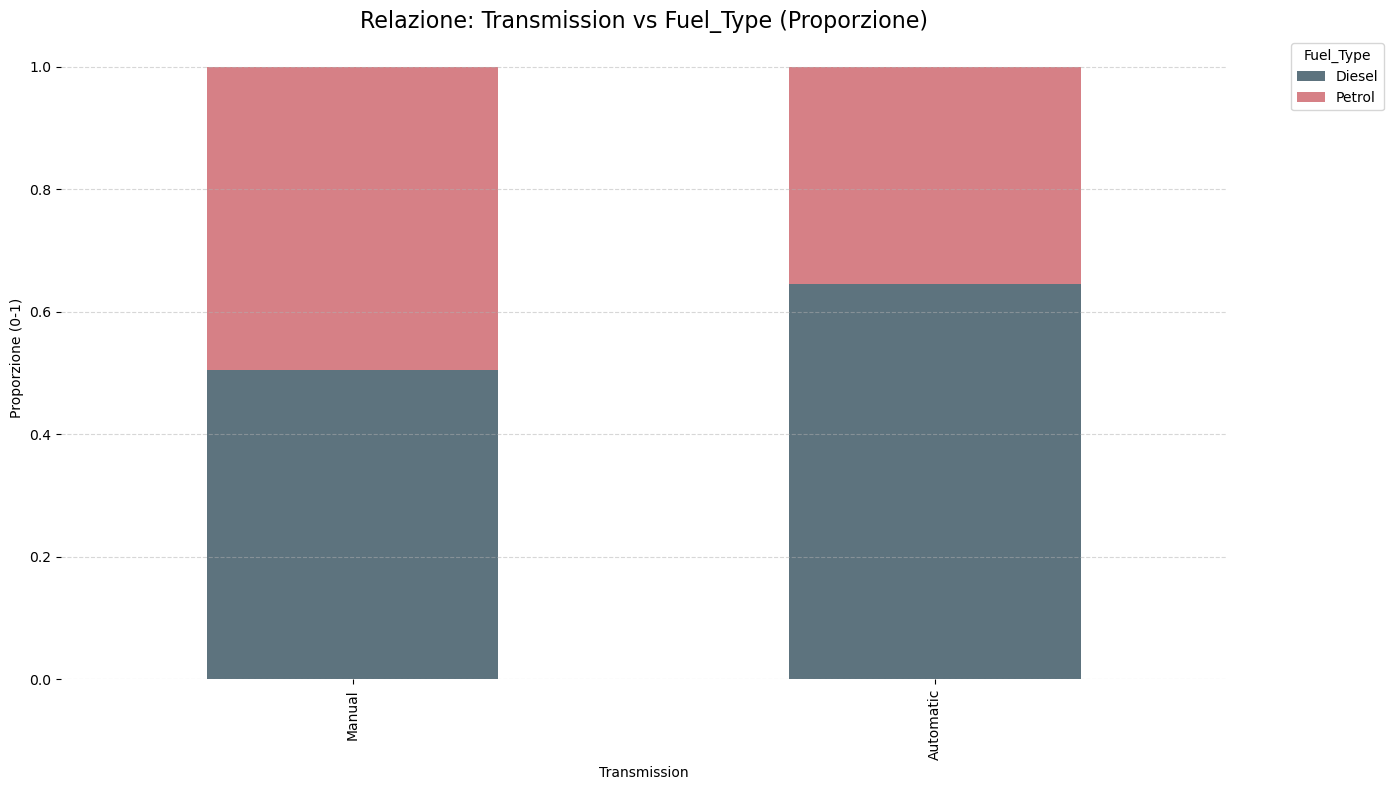

In [529]:
cat1 = 'Transmission'
cat2 = 'Fuel_Type'

cross_tab_prop = pd.crosstab(df[cat1], df[cat2], normalize='index')
cross_tab_prop = cross_tab_prop.sort_values(by='Diesel', ascending=True)

ax = cross_tab_prop.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#5D737E', '#D68086'])

plt.title(f'Relazione: {cat1} vs {cat2} (Proporzione)', fontsize=16)
plt.ylabel('Proporzione (0-1)')
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.box(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Sembra che le auto automatiche usino maggiormente il Diesel.

In [530]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [531]:
contingency_table = pd.crosstab(df['Transmission'], df['Fuel_Type'])

print("--- Tabella di Contingenza (Transmission vs Fuel_Type) ---")
print(contingency_table)
print("\n" + "="*50 + "\n")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Statistica Chi-Quadro: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).")
else:
    print("Risultato: Le variabili sono INDIPENDENTI (Non c'è relazione).")

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V di Cramér (Forza della relazione 0-1): {cramer_v:.3f}")

--- Tabella di Contingenza (Transmission vs Fuel_Type) ---
Fuel_Type     Diesel  Petrol
Transmission                
Automatic       1079     593
Manual          2037    2000


Statistica Chi-Quadro: 93.92
P-Value: 0.0000
Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).
V di Cramér (Forza della relazione 0-1): 0.128


C'è una relazione molto debole. Il modello ha bisogno di entrambe le colonne per capire il prezzo. 

Riassumiamo tutto quello che abbiamo scoperto in questa analisi:
- Vi è una correlazione molto positiva tra `Power` e `Price`
- Vi è una correlazione molto positiva tra `Engine` e `Price`
- Sia `Power` e sia `Engine` influenzano `Price` allo stesso modo (rischio multicollinearità);
- Vi è una correlazione negativa tra `Age` e `Price`, banalmente più l'auto invecchia e meno costa;
- Vi è una correlazione negativa tra `Mileage` e `Price`, motori più efficienti sono legati ad auto più economiche e non troppo potenti, auto costone sono molto potenti e consumano di più;
- Vi è una correlazione negativa tra `Owner_Type` e `Price`, un auto che ha avuto più proprietari potrebbe essere in condizioni peggiori oppure essere più vecchia;
- La `Location` non sembra influenzare più di tanto il prezzo;
- Sembra che auto più costose utilizzino il 'Diesel' invece del 'Petrol'.

Prima di andare alla prossima parte, dobbiamo però fare una trasformazione, per non sabotare le nostre analisi.

**Trasformazione**

L'applicazione della trasformazione $\log(Pric\text{e})$ è un passaggio fondamentale per preparare i dati alla modellazione di regressione per le seguenti ragioni:
- Normalizzazione della Distribuzione: La regressione lineare assume che i residui del modello siano distribuiti normalmente. Le variabili target fortemente asimmetriche, come il nostro Price, violano questa assunzione. La trasformazione logaritmica agisce per ridurre l'asimmetria, rendendo la distribuzione del prezzo (in scala logaritmica) molto più vicina alla normale.
- Gestione degli Outlier: La trasformazione riduce l'influenza degli outlier estremi (le auto di lusso a $120$ e $160$). Sulla scala logaritmica, la distanza tra $100$ e $160$ è molto minore che sulla scala originale, mitigando il loro impatto sul modello senza doverli eliminare.

In [532]:
df['Price'] = np.log1p(df['Price'])

---

## 1.4 Inferenza statistica

Adesso che conosciamo bene il nostro dataset, le nostre variabili e come essere sono correlate, possiamo applicare i principi dell'inferenza statistica.

**1. Transmission & Price**

Sembra che il tipo di cambio influenzi il prezzo.

Vediamo l'intervallo di confidenza:

In [533]:
from scipy import stats
from scipy.stats import normaltest
import statsmodels.api as sm

In [534]:
print(f"Gruppi di trasmissione: {df['Transmission'].unique()}\n")

group_per_transmission =  df.groupby('Transmission')['Price']
mean = group_per_transmission.mean()
std = group_per_transmission.std()

count = group_per_transmission.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_manual = stats.norm.interval(confidence_level, loc=mean['Manual'], scale=std_err['Manual'])
interval_automatic = stats.norm.interval(confidence_level, loc=mean['Automatic'], scale=std_err['Automatic'])

print("---- Media per gruppo di tramissione ----")
print(f"Manual:\t\t {mean['Manual']:.2f}\nAutomatic:\t {mean['Automatic']:.2f}\n")

print("---- Std Dev per gruppo di tramissione ----")
print(f"Manual:\t\t {std['Manual']:.2f}\nAutomatic:\t {std['Automatic']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"Manual:\t\t {std_err['Manual']:.2f}\nAutomatic:\t {std_err['Automatic']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"Manual:\t\t ({interval_manual[0]:.2f}, {interval_manual[1]:.2f})")
print(f"Automatic:\t ({interval_automatic[0]:.2f}, {interval_automatic[1]:.2f})\n")

Gruppi di trasmissione: ['Manual' 'Automatic']

---- Media per gruppo di tramissione ----
Manual:		 1.75
Automatic:	 2.77

---- Std Dev per gruppo di tramissione ----
Manual:		 0.48
Automatic:	 0.75

---- Std Err per gruppo di tramissione ----
Manual:		 0.01
Automatic:	 0.02

---- Confidence Interval di price per gruppo di tramissione ----
Manual:		 (1.74, 1.77)
Automatic:	 (2.73, 2.81)



Eseguiamo un Two Sample T-Test verificare l'affermazione vista in precedenza, ovvero se c'è una differenza significatica tra la media del prezzo delle auto Automatiche e quello delle Manuali.

In [535]:
manual = df[df['Transmission'] == 'Manual']['Price']
automatic = df[df['Transmission'] == 'Automatic']['Price']

t_stat, p_value = stats.ttest_ind(manual, automatic)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")

Test statistic: -61.50
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.


**2. Price**

Sembra che Price adesso tenda ad una ditribuzione Gaussiana:

In [536]:
statistic, p_value = normaltest(df['Price'])

alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value > alpha:
    print("E' Gaussiano. L'ipotesi H0 è vera.")
else:
    print("H0 rifiutata")

Test statistic: 495.08
P-value: 0.0000000000
H0 rifiutata


Ma andiamo a vedere un Q-Q plot:

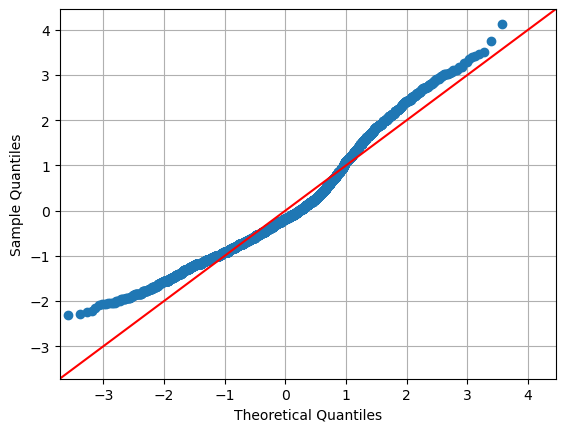

In [537]:
sm.qqplot(df['Price'], fit=True, line='45')
plt.grid()
plt.show()

Senza dubbio abbiamo avuto un netto miglioramto rispetto alla distribuzione prima della trasformazione. 
Il nostro modello ne trarrà vantaggio. 

**3. Automatic & Manual**

Abbiamo notato che nel nostro dataset le auto a cambio Manuale sono più di quelle automatiche, vediamo se è così pure nella nostra popolazione:

In [538]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total = df['Transmission'].count()

confidence_level = 0.95

proportion = count['Manual'] / total
conf_interval_man = sm.stats.proportion_confint(count['Manual'], total, alpha=1-confidence_level, method='normal')
conf_interval_aut = sm.stats.proportion_confint(count['Automatic'], total, alpha=1-confidence_level, method='normal')

print(f"---- Sample Proportion ----")
print(f"Manual:\t\t {proportion:.2f}")
print(f"Automatic:\t {1 - proportion:.2f}\n")

print("---- Confidence Interval of Proportion ----")
print(f"Manual:\t\t ({conf_interval_man[0]:.2f}, {conf_interval_man[1]:.2f})")
print(f"Automatic:\t ({conf_interval_aut[0]:.2f}, {conf_interval_aut[1]:.2f})\n")

---- Sample Proportion ----
Manual:		 0.71
Automatic:	 0.29

---- Confidence Interval of Proportion ----
Manual:		 (0.70, 0.72)
Automatic:	 (0.28, 0.30)



Per verificarlo abbiamo trovato un test statistico che confronta due proporzioni nello stesso sample, lo z-Test:

In [539]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total_count = count['Manual'] + count['Automatic']

null_hypothesis = 0.50
alpha = 0.05

z_stat, p_value = sm.stats.proportions_ztest(count=count['Manual'], nobs=total_count,  value=null_hypothesis)

prop_manual = count['Manual'] / total_count

print("---- Test Z per proporzione Trasmissione ----")
print(f"Proporzione Ipotizzata:\t {null_hypothesis}")
print(f"Proporzione Manuale: {prop_manual:.4f}\n")

print(f"Z-Test statistic: {z_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")
else:
    print("Conclusione: non c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")

---- Test Z per proporzione Trasmissione ----
Proporzione Ipotizzata:	 0.5
Proporzione Manuale: 0.7071

Z-Test statistic: 34.39
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.


**4. Owner_Type & Price**

Abbiamo notato che il tipo di proprietario influenza il prezzo, ovvero meno proprietari ha avuto l'auto e più costa.

In [540]:
print(f"Gruppi di proprietario: {df['Owner_Type'].unique()}\n")

group_per_owner =  df.groupby('Owner_Type')['Price']
mean = group_per_owner.mean()
std = group_per_owner.std()

count = group_per_owner.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_firt_ow = stats.norm.interval(confidence_level, loc=mean['First'], scale=std_err['First'])
interval_second_ow = stats.norm.interval(confidence_level, loc=mean['Second'], scale=std_err['Second'])
interval_third_ow = stats.norm.interval(confidence_level, loc=mean['Third'], scale=std_err['Third'])

print("---- Media per gruppo di Owner_Type ----")
print(f"Fisrt:\t\t {mean['First']:.2f}")
print(f"Second:\t\t {mean['Second']:.2f}")
print(f"Third:\t\t {mean['Third']:.2f}\n")

print("---- Std Dev per gruppo di Owner_Type ----")
print(f"First:\t\t {std['First']:.2f}")
print(f"Second:\t\t {std['Second']:.2f}")
print(f"Third:\t\t {std['Third']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"First:\t\t {std_err['First']:.2f}")
print(f"Second:\t\t {std_err['Second']:.2f}")
print(f"Third:\t\t {std_err['Third']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"First:\t\t ({interval_firt_ow[0]:.2f}, {interval_firt_ow[1]:.2f})")
print(f"Second:\t\t ({interval_second_ow[0]:.2f}, {interval_second_ow[1]:.2f})")
print(f"Third:\t\t ({interval_third_ow[0]:.2f}, {interval_third_ow[1]:.2f})\n")

Gruppi di proprietario: ['First' 'Second' 'Third']

---- Media per gruppo di Owner_Type ----
Fisrt:		 2.10
Second:		 1.86
Third:		 1.53

---- Std Dev per gruppo di Owner_Type ----
First:		 0.72
Second:		 0.75
Third:		 0.69

---- Std Err per gruppo di tramissione ----
First:		 0.01
Second:		 0.03
Third:		 0.07

---- Confidence Interval di price per gruppo di tramissione ----
First:		 (2.08, 2.12)
Second:		 (1.81, 1.91)
Third:		 (1.39, 1.67)



Eseguiamo un Two Sample T-Test ma solamente tra i campioni 'First' e 'Second', essendo quelli più presenti nel dataset:

In [541]:
first = df[df['Owner_Type'] == 'First']['Price']
second = df[df['Owner_Type'] == 'Second']['Price']

t_stat, p_value = stats.ttest_ind(first, second)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")

Test statistic: 8.90
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.


Esportiamo il dataset:

In [542]:
df.to_csv("dataset_for_modeling.csv", index=False)

df.head()

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,2.602690
1,Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,1.704748
2,Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,1.945910
3,Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,2.930660
4,Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,1.504077


In [543]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

---

# 2. Modellazione Statistica e Machine Learning

Nella prima parte abbiamo conosciuto il dataset, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte.

Adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

## 2.1 Analisi Statistica e Regressione (Inference)

Iniziamo con l'approccio statistico, l'attenzione verrà posta sulla significatività statistica e sull'interpretazione delle varie variabili (coefficienti). Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda, per questo motivo NON è necessario dividere in train set e test set.

Diciamo che in questa prima parte non applichiamo nessuno scaling e ne variabili dummiy perché il nostro unico obiettivo è l'understanding.

### Selezione delle variabili

Testo sulle principali variabili che abbiamo scelto.

La varaibile target è ovviamente Price.

Tuttavia alcune variabili catgoriche dobbiamo convertirle in variabili dummy per far si che il modello le possa leggere:

In [ ]:
df['Fuel_Type_Dummy'] = df['Fuel_Type'].map({
    'Diesel': 1,
    'Petrol': 2
})

df['Transmission_Dummy'] = df['Transmission'].map({
    'Manual': 1,
    'Automatic': 2
})

df['Owner_Type_Dummy'] = df['Owner_Type'].map({
    'First': 1,
    'Second': 2,
    'Third': 3
})

### Applicazione dei modelli

In [545]:
import statsmodels.api as sm

y_inference = df['Price']
vars_da_usare = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Owner_Type', 'Fuel_Type', 'Seats'] 
x_inference = df[vars_da_usare].copy()

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).